In [3]:
# ============================================================================
# STEP 1: DATA LOADING & INITIAL INSPECTION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("🚀 CARBON TRADING DATA - STEP 1: LOADING & INSPECTION")
print("="*80)

🚀 CARBON TRADING DATA - STEP 1: LOADING & INSPECTION


In [4]:
print("\n📁 Loading CSV file...")
df = pd.read_csv('enhanced_carbon_data.csv')

print(f"✅ Data loaded successfully!")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"📅 Date range: {df['Date'].iloc[0]} → {df['Date'].iloc[-1]}")


📁 Loading CSV file...
✅ Data loaded successfully!
📊 Shape: 1,142 rows × 291 columns
📅 Date range: 2021-01-04 → 2025-06-09


In [5]:
# 1B. BASIC DATA INFO
# ============================================================================

print("\n" + "="*50)
print("📋 BASIC DATA INFORMATION")
print("="*50)

# Data types overview
print("\n🔍 Data Types Summary:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

# Memory usage
memory_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"\n💾 Memory usage: {memory_mb:.1f} MB")



📋 BASIC DATA INFORMATION

🔍 Data Types Summary:
  float64: 159 columns
  int64: 127 columns
  object: 5 columns

💾 Memory usage: 2.8 MB


In [6]:
# 1C. CHECK FOR PROBLEMATIC COLUMNS
# ============================================================================

print("\n" + "="*50)
print("🔍 IDENTIFYING STRING/OBJECT COLUMNS")
print("="*50)

# Find string/object columns
string_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Found {len(string_cols)} string/object columns:")

for col in string_cols:
    unique_count = df[col].nunique()
    sample_values = df[col].dropna().head(3).tolist()
    print(f"  🔤 {col}: {unique_count} unique values")
    print(f"      Sample: {sample_values}")
    print()



🔍 IDENTIFYING STRING/OBJECT COLUMNS

📝 Found 5 string/object columns:
  🔤 Date: 1142 unique values
      Sample: ['2021-01-04', '2021-01-05', '2021-01-06']

  🔤 Accumulation/Distribution: 1064 unique values
      Sample: ['2.37?M', '2.36?M', '2.37?M']

  🔤 Chaikin Oscillator: 1054 unique values
      Sample: ['7.33?K', '3.27?K', '5.84?K']

  🔤 Regime: 2 unique values
      Sample: ['Bull', 'Bull', 'Bull']

  🔤 Vol_Regime: 2 unique values
      Sample: ['Stable', 'Stable', 'Stable']



📊 Creating data type distribution plot...


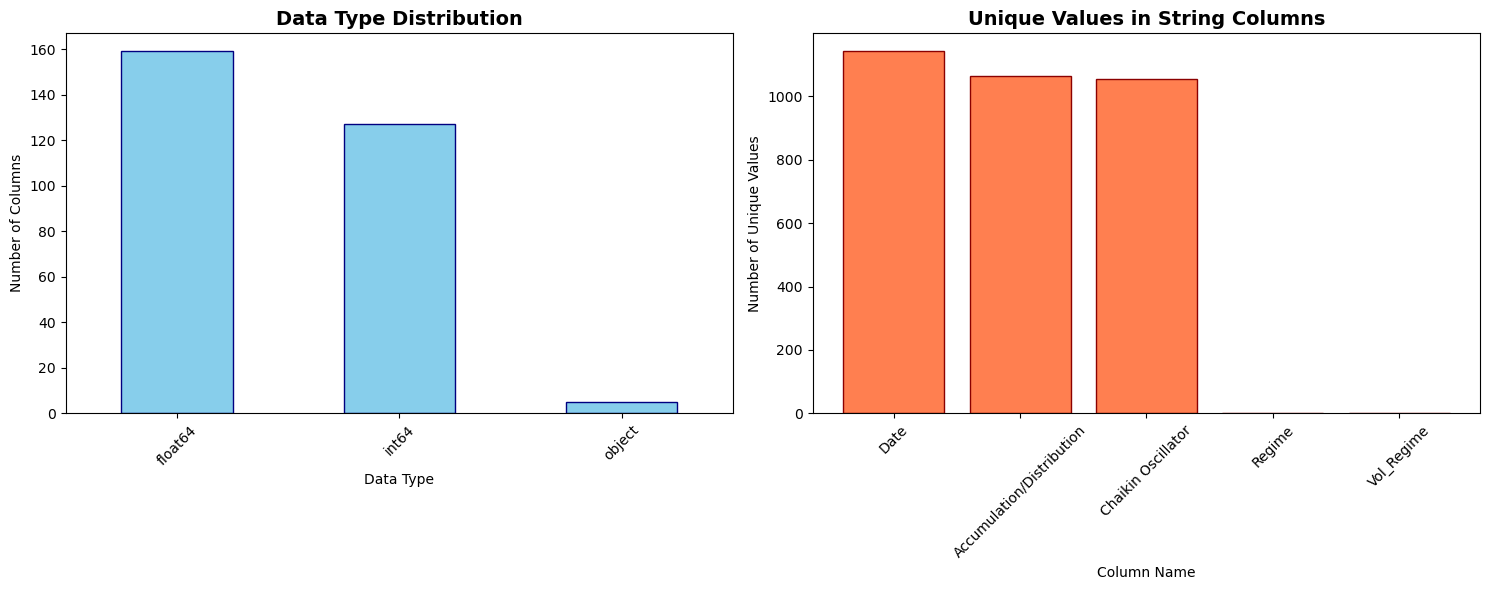

In [7]:
# ============================================================================
# 1D. VISUAL: DATA TYPE DISTRIBUTION
# ============================================================================

print("📊 Creating data type distribution plot...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Data type counts
dtype_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='navy')
ax1.set_title('Data Type Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Data Type')
ax1.set_ylabel('Number of Columns')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: String columns analysis
if len(string_cols) > 0:
    string_unique_counts = [df[col].nunique() for col in string_cols]
    ax2.bar(string_cols, string_unique_counts, color='coral', edgecolor='darkred')
    ax2.set_title('Unique Values in String Columns', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Column Name')
    ax2.set_ylabel('Number of Unique Values')
    ax2.tick_params(axis='x', rotation=45)
else:
    ax2.text(0.5, 0.5, 'No string columns found!', 
             transform=ax2.transAxes, ha='center', va='center', fontsize=12)
    ax2.set_title('String Columns Analysis')

plt.tight_layout()
plt.show()

In [8]:
# 1E. CHECK FOR MISSING VALUES
# ============================================================================

print("\n" + "="*50)
print("❓ MISSING VALUES ANALYSIS")
print("="*50)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Count', ascending=False)

# Show only columns with missing values
missing_cols = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_cols) > 0:
    print(f"⚠️  Found {len(missing_cols)} columns with missing values:")
    print(missing_cols.head(10))
else:
    print("✅ No missing values found in any columns!")


❓ MISSING VALUES ANALYSIS
✅ No missing values found in any columns!


In [9]:

# ============================================================================

if len(missing_cols) > 0:
    print("\n📊 Creating missing values visualization...")
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Select columns with most missing values for visualization
    top_missing = missing_cols.head(20).index.tolist()
    
    if len(top_missing) > 0:
        missing_matrix = df[top_missing].isnull()
        sns.heatmap(missing_matrix, yticklabels=False, cbar=True, cmap='viridis', ax=ax)
        ax.set_title('Missing Values Pattern (Top 20 columns)', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [10]:
# ============================================================================
# 1G. SAMPLE DATA PREVIEW
# ============================================================================

print("\n" + "="*50)
print("👀 DATA PREVIEW")
print("="*50)

print("\n📋 First 3 rows:")
print(df.head(3))

print(f"\n📋 Random sample of key columns:")
key_cols = ['Date', 'Close', 'Volumes', 'daily_emissions', 'RSI', 'Regime']
if all(col in df.columns for col in key_cols):
    print(df[key_cols].sample(5))
else:
    print("Some key columns not found - showing first 6 columns instead:")
    print(df.iloc[:, :6].sample(5))



👀 DATA PREVIEW

📋 First 3 rows:
         Date   Open   High    Low  Close  MACD Histogram    MACF  \
0  2021-01-04  32.70  34.25  32.70  33.69          0.0398  1.2882   
1  2021-01-05  33.75  33.75  32.75  32.96          0.0039  1.2533   
2  2021-01-06  33.14  33.71  32.83  33.63          0.0125  1.2650   

   MACD Signal  Volumes    SAR  ...  Close_Vol_5D  Close_Vol_20D  Volume_MA_5  \
0       1.2484    19300  30.33  ...      0.022503       0.024845      19926.0   
1       1.2494    19370  30.56  ...      0.022503       0.024845      19926.0   
2       1.2525    17360  30.78  ...      0.022503       0.024845      19926.0   

   Volume_Ratio_20D  Forward_Return_1D  Forward_Return_5D  Forward_Return_10D  \
0          1.144053          -0.021668           0.024933           -0.061443   
1          1.144053           0.020328           0.051578            0.003944   
2          1.144053           0.033601           0.000595           -0.021409   

   Forward_Direction_1D  Forward_Directi

In [11]:
# ============================================================================
# 1H. IDENTIFY DATA QUALITY ISSUES
# ============================================================================

print("\n" + "="*60)
print("🚨 DATA QUALITY ISSUES DETECTED")
print("="*60)

issues_found = []

# Check for formatted numbers (like "2.37?M" or "7.33?K")
for col in string_cols:
    sample_vals = df[col].dropna().astype(str).head(10).tolist()
    
    # Check for ?M or ?K patterns
    has_m_suffix = any('?M' in str(val) for val in sample_vals)
    has_k_suffix = any('?K' in str(val) for val in sample_vals)
    
    if has_m_suffix:
        issues_found.append(f"❌ {col}: Contains '?M' suffix - needs conversion to millions")
    elif has_k_suffix:
        issues_found.append(f"❌ {col}: Contains '?K' suffix - needs conversion to thousands")

# Check Date column format
if 'Date' in df.columns:
    if df['Date'].dtype == 'object':
        issues_found.append("❌ Date: String format - needs conversion to datetime")

# Print issues
if issues_found:
    print("\n🔧 ISSUES TO FIX:")
    for i, issue in enumerate(issues_found, 1):
        print(f"{i}. {issue}")
else:
    print("✅ No obvious data quality issues found!")



🚨 DATA QUALITY ISSUES DETECTED

🔧 ISSUES TO FIX:
1. ❌ Accumulation/Distribution: Contains '?M' suffix - needs conversion to millions
2. ❌ Chaikin Oscillator: Contains '?K' suffix - needs conversion to thousands
3. ❌ Date: String format - needs conversion to datetime


In [12]:
# ============================================================================
# 1I. SUMMARY STATISTICS
# ============================================================================

print("\n" + "="*50)
print("📊 SUMMARY STATISTICS (Numeric Columns)")
print("="*50)

numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\n🔢 Found {len(numeric_cols)} numeric columns")

# Show summary for key trading columns
key_numeric = ['Open', 'High', 'Low', 'Close', 'Volumes', 'daily_emissions']
available_key = [col for col in key_numeric if col in df.columns]

if available_key:
    print(f"\n📈 Summary of key trading metrics:")
    summary_stats = df[available_key].describe()
    print(summary_stats.round(2))



📊 SUMMARY STATISTICS (Numeric Columns)

🔢 Found 286 numeric columns

📈 Summary of key trading metrics:
          Open     High      Low    Close   Volumes  daily_emissions
count  1142.00  1142.00  1142.00  1142.00   1142.00          1142.00
mean     71.73    73.07    70.43    71.74  25888.63       2114815.55
std      14.59    14.82    14.32    14.53   9948.36        572702.85
min      31.62    32.32    31.29    31.62   2190.00        824111.42
25%      63.38    64.76    62.10    63.22  19215.00       1655747.52
50%      72.07    73.63    70.81    72.15  24615.00       2131745.43
75%      83.48    84.84    81.82    83.25  31160.00       2514387.88
max     100.16   101.25    99.00   100.34  80530.00       3633096.42


In [13]:
# ============================================================================
# 1J. NEXT STEPS SUMMARY
# ============================================================================

print("\n" + "="*60)
print("🎯 STEP 1 COMPLETE - NEXT ACTIONS")
print("="*60)

print("\n✅ COMPLETED:")
print("  • Loaded 1,142 rows × 291 columns")
print("  • Identified data types and structure")
print("  • Checked for missing values")
print("  • Detected data quality issues")

print("\n🔧 STEP 2 PRIORITIES:")
print("  • Fix formatted number columns (?M, ?K suffixes)")
print("  • Convert Date column to datetime")
print("  • Categorize all variables (binary, discrete, continuous)")
print("  • Create comprehensive missing values report")

print("\n" + "="*60)
print("Ready to proceed to Step 2: Data Cleaning! 🚀")
print("="*60)


🎯 STEP 1 COMPLETE - NEXT ACTIONS

✅ COMPLETED:
  • Loaded 1,142 rows × 291 columns
  • Identified data types and structure
  • Checked for missing values
  • Detected data quality issues

🔧 STEP 2 PRIORITIES:
  • Fix formatted number columns (?M, ?K suffixes)
  • Convert Date column to datetime
  • Categorize all variables (binary, discrete, continuous)
  • Create comprehensive missing values report

Ready to proceed to Step 2: Data Cleaning! 🚀


In [14]:
# ============================================================================
# STEP 2: DATA CLEANING & FORMATTING
# ============================================================================

print("="*80)
print("🧹 CARBON TRADING DATA - STEP 2: DATA CLEANING")
print("="*80)

# Make a copy to preserve original
df_clean = df.copy()
print(f"✅ Created working copy with {df_clean.shape[0]:,} rows × {df_clean.shape[1]:,} columns")

🧹 CARBON TRADING DATA - STEP 2: DATA CLEANING
✅ Created working copy with 1,142 rows × 291 columns


In [15]:
# ============================================================================
# 2A. FIX FORMATTED NUMBER COLUMNS (ROBUST VERSION)
# ============================================================================

print("\n" + "="*60)
print("🔧 FIXING FORMATTED NUMBER COLUMNS (ROBUST)")
print("="*60)

# First, let's investigate what we're dealing with
print("🔍 INVESTIGATING PROBLEMATIC COLUMNS...")

def investigate_column(col_name):
    """Investigate a column's unique value patterns"""
    print(f"\n📋 Analyzing {col_name}:")
    
    # Get all unique values (first 20)
    unique_vals = df_clean[col_name].unique()[:20]
    print(f"  First 20 unique values: {unique_vals}")
    
    # Check for different suffixes
    vals_str = df_clean[col_name].astype(str)
    has_m = vals_str.str.contains('\?M').sum()
    has_k = vals_str.str.contains('\?K').sum()
    has_other = vals_str.str.contains('\?').sum() - has_m - has_k
    
    print(f"  Values with ?M: {has_m}")
    print(f"  Values with ?K: {has_k}")
    print(f"  Values with other ?: {has_other}")
    
    # Sample negative values
    negative_samples = df_clean[col_name][df_clean[col_name].astype(str).str.contains('-')]
    if len(negative_samples) > 0:
        print(f"  Negative value samples: {negative_samples.head(3).tolist()}")
    
    return {'m_count': has_m, 'k_count': has_k, 'other_count': has_other}

# Investigate both problematic columns
investigate_column('Accumulation/Distribution')
investigate_column('Chaikin Oscillator')

print("\n" + "="*50)
print("🛠️ ROBUST CONVERSION FUNCTION")
print("="*50)

def convert_formatted_number(value):
    """
    Convert formatted numbers with ?M, ?K suffixes to float
    Handles negative values and mixed formats
    """
    if pd.isna(value):
        return np.nan
    
    # Convert to string and clean whitespace
    val_str = str(value).strip()
    
    # Check for ?M suffix (millions)
    if '?M' in val_str:
        number_part = val_str.replace('?M', '').strip()
        try:
            return float(number_part) * 1_000_000
        except ValueError:
            print(f"Warning: Could not convert ?M value: {val_str}")
            return np.nan
    
    # Check for ?K suffix (thousands)  
    elif '?K' in val_str:
        number_part = val_str.replace('?K', '').strip()
        try:
            return float(number_part) * 1_000
        except ValueError:
            print(f"Warning: Could not convert ?K value: {val_str}")
            return np.nan
    
    # If no suffix, try direct conversion
    else:
        try:
            return float(val_str)
        except ValueError:
            print(f"Warning: Could not convert value: {val_str}")
            return np.nan

print("✅ Conversion function created!")



🔧 FIXING FORMATTED NUMBER COLUMNS (ROBUST)
🔍 INVESTIGATING PROBLEMATIC COLUMNS...

📋 Analyzing Accumulation/Distribution:
  First 20 unique values: ['2.37?M' '2.36?M' '2.39?M' '2.4?M' '2.38?M' '2.41?M' '2.43?M' '2.46?M'
 '2.47?M' '2.45?M' '2.48?M' '2.49?M' '2.42?M' '2.44?M' '2.5?M' '2.53?M'
 '2.51?M' '2.52?M' '2.55?M' '2.54?M']
  Values with ?M: 105
  Values with ?K: 1033
  Values with other ?: 0
  Negative value samples: ['-2.55?K', '-8.21?K', '-37.85?K']

📋 Analyzing Chaikin Oscillator:
  First 20 unique values: ['7.33?K' '3.27?K' '5.84?K' '12.19?K' '16.23?K' '15.08?K' '12.13?K'
 '7.49?K' '7.29?K' '-2.39?K' '-8.73?K' '-2.85?K' '-3.62?K' '2.6?K'
 '9.53?K' '4.98?K' '5.22?K' '10.57?K' '18.1?K' '12.07?K']
  Values with ?M: 4
  Values with ?K: 1080
  Values with other ?: 0
  Negative value samples: ['-2.39?K', '-8.73?K', '-2.85?K']

🛠️ ROBUST CONVERSION FUNCTION
✅ Conversion function created!


In [16]:
# ============================================================================
# NOW APPLY ROBUST CONVERSION
# ============================================================================

print("\n🔄 Converting Accumulation/Distribution...")

# Before conversion
print("📋 BEFORE conversion:")
sample_before_acc = df_clean['Accumulation/Distribution'].head(5).tolist()
print(f"  Sample values: {sample_before_acc}")

# Apply conversion
df_clean['Accumulation/Distribution'] = df_clean['Accumulation/Distribution'].apply(convert_formatted_number)

# After conversion  
print("📋 AFTER conversion:")
sample_after_acc = df_clean['Accumulation/Distribution'].head(5).tolist()
print(f"  Sample values: {sample_after_acc}")

# Check for any NaN values introduced
nan_count_acc = df_clean['Accumulation/Distribution'].isna().sum()
print(f"  NaN values created: {nan_count_acc}")

print("\n🔄 Converting Chaikin Oscillator...")

# Before conversion
print("📋 BEFORE conversion:")
sample_before_chaik = df_clean['Chaikin Oscillator'].head(5).tolist()
print(f"  Sample values: {sample_before_chaik}")

# Apply conversion
df_clean['Chaikin Oscillator'] = df_clean['Chaikin Oscillator'].apply(convert_formatted_number)

# After conversion
print("📋 AFTER conversion:")
sample_after_chaik = df_clean['Chaikin Oscillator'].head(5).tolist()
print(f"  Sample values: {sample_after_chaik}")

# Check for any NaN values introduced
nan_count_chaik = df_clean['Chaikin Oscillator'].isna().sum()
print(f"  NaN values created: {nan_count_chaik}")



🔄 Converting Accumulation/Distribution...
📋 BEFORE conversion:
  Sample values: ['2.37?M', '2.36?M', '2.37?M', '2.39?M', '2.4?M']
📋 AFTER conversion:
  Sample values: [2370000.0, 2360000.0, 2370000.0, 2390000.0, 2400000.0]
  NaN values created: 0

🔄 Converting Chaikin Oscillator...
📋 BEFORE conversion:
  Sample values: ['7.33?K', '3.27?K', '5.84?K', '12.19?K', '16.23?K']
📋 AFTER conversion:
  Sample values: [7330.0, 3270.0, 5840.0, 12190.0, 16230.0]
  NaN values created: 0



📊 Creating validation plots...


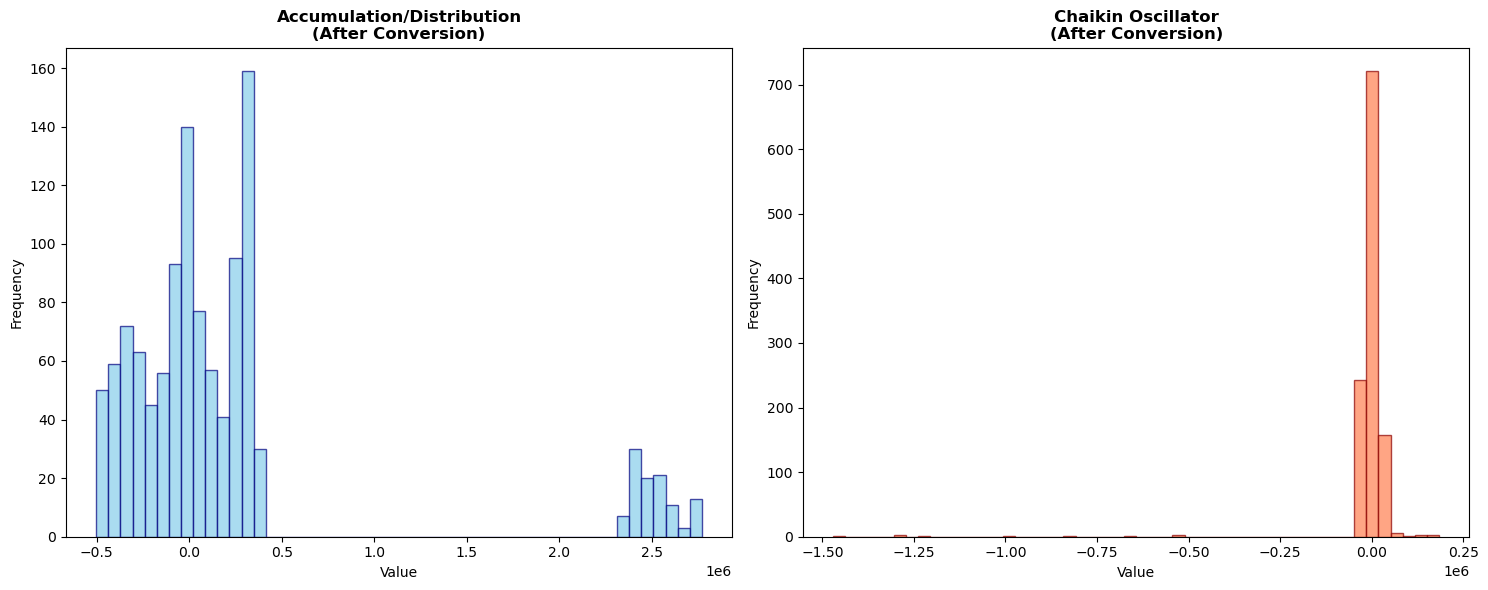

In [17]:
# ============================================================================
# VALIDATION AND VISUALIZATION
# ============================================================================

print("\n📊 Creating validation plots...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Accumulation/Distribution
if not df_clean['Accumulation/Distribution'].isna().all():
    ax1.hist(df_clean['Accumulation/Distribution'].dropna(), bins=50, alpha=0.7, 
             color='skyblue', edgecolor='navy')
    ax1.set_title('Accumulation/Distribution\n(After Conversion)', fontweight='bold')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
else:
    ax1.text(0.5, 0.5, 'All values converted to NaN\nCheck data!', 
             transform=ax1.transAxes, ha='center', va='center')
    ax1.set_title('Accumulation/Distribution - ERROR')

# Plot 2: Chaikin Oscillator  
if not df_clean['Chaikin Oscillator'].isna().all():
    ax2.hist(df_clean['Chaikin Oscillator'].dropna(), bins=50, alpha=0.7, 
             color='coral', edgecolor='darkred')
    ax2.set_title('Chaikin Oscillator\n(After Conversion)', fontweight='bold')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Frequency')
else:
    ax2.text(0.5, 0.5, 'All values converted to NaN\nCheck data!', 
             transform=ax2.transAxes, ha='center', va='center')
    ax2.set_title('Chaikin Oscillator - ERROR')

plt.tight_layout()
plt.show()

In [18]:
# ============================================================================
# SUMMARY AND VALIDATION
# ============================================================================

print("\n" + "="*50)
print("✅ CONVERSION SUMMARY")
print("="*50)

print("📊 Final statistics:")
print(f"  Accumulation/Distribution:")
print(f"    • Min: {df_clean['Accumulation/Distribution'].min():,.0f}")
print(f"    • Max: {df_clean['Accumulation/Distribution'].max():,.0f}")
print(f"    • Mean: {df_clean['Accumulation/Distribution'].mean():,.0f}")
print(f"    • NaN count: {df_clean['Accumulation/Distribution'].isna().sum()}")

print(f"  Chaikin Oscillator:")
print(f"    • Min: {df_clean['Chaikin Oscillator'].min():,.0f}")
print(f"    • Max: {df_clean['Chaikin Oscillator'].max():,.0f}")
print(f"    • Mean: {df_clean['Chaikin Oscillator'].mean():,.0f}")
print(f"    • NaN count: {df_clean['Chaikin Oscillator'].isna().sum()}")

# Check if conversion was successful
total_nans = nan_count_acc + nan_count_chaik
if total_nans == 0:
    print("\n✅ All conversions successful! No NaN values created.")
elif total_nans < 10:
    print(f"\n⚠️ {total_nans} values could not be converted (very few - likely OK)")
else:
    print(f"\n❌ {total_nans} values could not be converted - investigate data quality")

print("\n" + "="*60)
print("Section 2A Complete! ✅")
print("="*60)


✅ CONVERSION SUMMARY
📊 Final statistics:
  Accumulation/Distribution:
    • Min: -503,650
    • Max: 2,770,000
    • Mean: 219,738
    • NaN count: 0
  Chaikin Oscillator:
    • Min: -1,470,000
    • Max: 183,650
    • Mean: -7,894
    • NaN count: 0

✅ All conversions successful! No NaN values created.

Section 2A Complete! ✅


In [19]:
# ============================================================================
# 2B. FIX DATE COLUMN (ROBUST VERSION)
# ============================================================================

print("\n" + "="*60)
print("📅 CONVERTING DATE COLUMN (ROBUST VERSION)")
print("="*60)

# Before conversion - detailed inspection
print(f"📋 BEFORE conversion:")
print(f"Date dtype: {df_clean['Date'].dtype}")
print(f"Sample dates: {df_clean['Date'].head(5).tolist()}")
print(f"Date column shape: {df_clean['Date'].shape}")
print(f"Any null dates? {df_clean['Date'].isnull().sum()}")

# Check for any problematic date values
print(f"\nUnique date count: {df_clean['Date'].nunique()}")
print(f"Total rows: {len(df_clean)}")

# Look for any weird date formats
unique_dates_sample = df_clean['Date'].unique()[:10]
print(f"First 10 unique dates: {unique_dates_sample}")

print("\n🔄 Converting Date column to datetime...")

try:
    # Method 1: Standard conversion
    df_clean['Date'] = pd.to_datetime(df_clean['Date'])
    print("✅ Standard conversion successful!")
    
except Exception as e:
    print(f"❌ Standard conversion failed: {e}")
    print("🔄 Trying alternative methods...")
    
    try:
        # Method 2: With error handling
        df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
        
        # Check if any dates became NaT (Not a Time)
        null_dates = df_clean['Date'].isnull().sum()
        if null_dates > 0:
            print(f"⚠️ {null_dates} dates became NaT during conversion")
        else:
            print("✅ Alternative conversion successful!")
            
    except Exception as e2:
        print(f"❌ Alternative conversion also failed: {e2}")

# After conversion - validation
print(f"\n📋 AFTER conversion:")
print(f"Date dtype: {df_clean['Date'].dtype}")
print(f"Sample dates: {df_clean['Date'].head(5).tolist()}")

# Check if conversion was successful
if pd.api.types.is_datetime64_any_dtype(df_clean['Date']):
    print("✅ Date column is now datetime type!")
    
    # Set as index for time series analysis
    print("\n🔄 Setting Date as index...")
    df_clean.set_index('Date', inplace=True)
    print("✅ Date set as index!")
    
    # Verify index
    print(f"Index type: {type(df_clean.index)}")
    print(f"Index range: {df_clean.index.min()} to {df_clean.index.max()}")
        
else:
    print("❌ Date conversion failed - keeping as string for now")

print("\n" + "="*60)
print("Section 2B Complete!")
print("="*60)



📅 CONVERTING DATE COLUMN (ROBUST VERSION)
📋 BEFORE conversion:
Date dtype: object
Sample dates: ['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
Date column shape: (1142,)
Any null dates? 0

Unique date count: 1142
Total rows: 1142
First 10 unique dates: ['2021-01-04' '2021-01-05' '2021-01-06' '2021-01-07' '2021-01-08'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15']

🔄 Converting Date column to datetime...
✅ Standard conversion successful!

📋 AFTER conversion:
Date dtype: datetime64[ns]
Sample dates: [Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-05 00:00:00'), Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-07 00:00:00'), Timestamp('2021-01-08 00:00:00')]
✅ Date column is now datetime type!

🔄 Setting Date as index...
✅ Date set as index!
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index range: 2021-01-04 00:00:00 to 2025-06-09 00:00:00

Section 2B Complete!


In [20]:
# ============================================================================
# 2C. DATA TYPE SUMMARY AFTER CLEANING
# ============================================================================

print("\n" + "="*60)
print("🔍 DATA TYPES AFTER CLEANING")
print("="*60)

# Count data types
dtype_counts_after = df_clean.dtypes.value_counts()
print("\n📊 Updated data type counts:")
for dtype, count in dtype_counts_after.items():
    print(f"  {dtype}: {count} columns")

# Check remaining string columns
remaining_string_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Remaining string columns ({len(remaining_string_cols)}):")
for col in remaining_string_cols:
    unique_vals = df_clean[col].unique()[:5]  # Show first 5 unique values
    print(f"  🔤 {col}: {unique_vals}")



🔍 DATA TYPES AFTER CLEANING

📊 Updated data type counts:
  float64: 161 columns
  int64: 127 columns
  object: 2 columns

📝 Remaining string columns (2):
  🔤 Regime: ['Bull' 'Bear']
  🔤 Vol_Regime: ['Stable' 'Volatile']


In [21]:
# ============================================================================
# 2D. CATEGORIZE VARIABLES BY TYPE
# ============================================================================

print("\n" + "="*60)
print("🏷️ CATEGORIZING VARIABLES BY TYPE")
print("="*60)

# Initialize category lists
binary_vars = []
discrete_vars = []
continuous_vars = []

# Check each column
for col in df_clean.columns:
    unique_count = df_clean[col].nunique()
    col_dtype = df_clean[col].dtype
    
    if col_dtype == 'object':
        if unique_count == 2:
            binary_vars.append(col)
        else:
            discrete_vars.append(col)
    elif col_dtype in ['int64', 'float64']:
        if unique_count == 2 and set(df_clean[col].unique()).issubset({0, 1}):
            binary_vars.append(col)
        elif unique_count <= 15:  # Arbitrary threshold for discrete
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)

print(f"🔢 BINARY variables ({len(binary_vars)}):")
print(f"  First 10: {binary_vars[:10]}")
if len(binary_vars) > 10:
    print(f"  ... and {len(binary_vars)-10} more")

print(f"\n🎯 DISCRETE variables ({len(discrete_vars)}):")
print(f"  All: {discrete_vars}")

print(f"\n📈 CONTINUOUS variables ({len(continuous_vars)}):")
print(f"  First 15: {continuous_vars[:15]}")
if len(continuous_vars) > 15:
    print(f"  ... and {len(continuous_vars)-15} more")


🏷️ CATEGORIZING VARIABLES BY TYPE
🔢 BINARY variables (128):
  First 10: ['Williams Fractal Down', 'Williams Fractal Up', 'Near_High_5D', 'Near_Low_5D', 'Near_High_10D', 'Near_Low_10D', 'Near_High_20D', 'Near_Low_20D', 'Near_High_50D', 'Near_Low_50D']
  ... and 118 more

🎯 DISCRETE variables (4):
  All: ['Carver_EMAC_Signal', 'Round_Level_5', 'Round_Level_10', 'Break_Resistance_1']

📈 CONTINUOUS variables (158):
  First 15: ['Open', 'High', 'Low', 'Close', 'MACD Histogram', 'MACF', 'MACD Signal', 'Volumes', 'SAR', 'SMA 20', 'SMA 50', 'SMA 100', 'SMA 200', 'Middle Bollinger', 'Upper Bollinger']
  ... and 143 more


In [22]:
# ============================================================================
# 2E. VALIDATE BINARY VARIABLES
# ============================================================================

print("\n" + "="*50)
print("🔍 VALIDATING BINARY VARIABLES")
print("="*50)

print("\n📊 Binary variable value distributions:")
for var in binary_vars[:10]:  # Show first 10
    value_counts = df_clean[var].value_counts()
    print(f"  {var}: {dict(value_counts)}")

# Convert string binary variables to numeric if needed
categorical_binary = ['Regime', 'Vol_Regime']
for col in categorical_binary:
    if col in df_clean.columns:
        print(f"\n🔄 Converting {col} to numeric binary...")
        if col == 'Regime':
            df_clean[f'{col}_Bull'] = (df_clean[col] == 'Bull').astype(int)
            print(f"  Created {col}_Bull: 1=Bull, 0=Bear")
        elif col == 'Vol_Regime':
            df_clean[f'{col}_Volatile'] = (df_clean[col] == 'Volatile').astype(int) 
            print(f"  Created {col}_Volatile: 1=Volatile, 0=Stable")



🔍 VALIDATING BINARY VARIABLES

📊 Binary variable value distributions:
  Williams Fractal Down: {0.0: 1000, 1.0: 142}
  Williams Fractal Up: {0.0: 990, 1.0: 152}
  Near_High_5D: {0: 933, 1: 209}
  Near_Low_5D: {0: 948, 1: 194}
  Near_High_10D: {0: 995, 1: 147}
  Near_Low_10D: {0: 1008, 1: 134}
  Near_High_20D: {0: 1036, 1: 106}
  Near_Low_20D: {0: 1051, 1: 91}
  Near_High_50D: {0: 1085, 1: 57}
  Near_Low_50D: {0: 1094, 1: 48}

🔄 Converting Regime to numeric binary...
  Created Regime_Bull: 1=Bull, 0=Bear

🔄 Converting Vol_Regime to numeric binary...
  Created Vol_Regime_Volatile: 1=Volatile, 0=Stable


In [23]:
# ============================================================================
# 2F. FINAL VALIDATION CHECKS
# ============================================================================

print("\n" + "="*60)
print("✅ FINAL VALIDATION CHECKS")
print("="*60)

# Check for any remaining issues
print("🔍 Final data quality checks:")

# 1. Missing values
missing_check = df_clean.isnull().sum().sum()
print(f"  Missing values: {missing_check} {'✅' if missing_check == 0 else '❌'}")

# 2. Data types
string_cols_remaining = len(df_clean.select_dtypes(include=['object']).columns)
print(f"  String columns remaining: {string_cols_remaining}")

# 3. Date index
print(f"  Date index: {type(df_clean.index)} {'✅' if 'DatetimeIndex' in str(type(df_clean.index)) else '❌'}")

# 4. Shape consistency
print(f"  Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]:,} columns")

# 5. Numeric conversion success
numeric_cols = len(df_clean.select_dtypes(include=[np.number]).columns)
print(f"  Numeric columns: {numeric_cols}")


✅ FINAL VALIDATION CHECKS
🔍 Final data quality checks:
  Missing values: 0 ✅
  String columns remaining: 2
  Date index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> ✅
  Shape: 1,142 rows × 292 columns
  Numeric columns: 290


In [24]:
# ============================================================================
# 2G. SAVE PROGRESS & SUMMARY
# ============================================================================

print("\n" + "="*60)
print("💾 SAVE PROGRESS")
print("="*60)

# Save the cleaned dataset
df_clean.to_csv('carbon_data_cleaned_step2.csv')
print("✅ Cleaned dataset saved as: 'carbon_data_cleaned_step2.csv'")

# Save variable categories for later use
categories_dict = {
    'binary_variables': binary_vars,
    'discrete_variables': discrete_vars, 
    'continuous_variables': continuous_vars
}

import json
with open('variable_categories.json', 'w') as f:
    json.dump(categories_dict, f, indent=2)
    
print("✅ Variable categories saved as: 'variable_categories.json'")

print("\n" + "="*60)
print("🎯 STEP 2 COMPLETE - SUMMARY")
print("="*60)

print("\n✅ COMPLETED:")
print("  • Fixed ?M and ?K formatted numbers")
print("  • Converted Date to datetime index")
print("  • Categorized variables into binary/discrete/continuous")
print("  • Created numeric versions of categorical variables")
print("  • Validated all conversions with plots")

print(f"\n📊 FINAL COUNTS:")
print(f"  • Binary: {len(binary_vars)} variables")
print(f"  • Discrete: {len(discrete_vars)} variables") 
print(f"  • Continuous: {len(continuous_vars)} variables")

print("\n🚀 READY FOR STEP 3:")
print("  • Statistical tests (stationarity, normality)")
print("  • Correlation analysis & multicollinearity")
print("  • Feature engineering & scaling")

print("\n" + "="*60)
print("Step 2 Complete! Ready for Step 3? 🚀")
print("="*60)


💾 SAVE PROGRESS
✅ Cleaned dataset saved as: 'carbon_data_cleaned_step2.csv'
✅ Variable categories saved as: 'variable_categories.json'

🎯 STEP 2 COMPLETE - SUMMARY

✅ COMPLETED:
  • Fixed ?M and ?K formatted numbers
  • Converted Date to datetime index
  • Categorized variables into binary/discrete/continuous
  • Created numeric versions of categorical variables
  • Validated all conversions with plots

📊 FINAL COUNTS:
  • Binary: 128 variables
  • Discrete: 4 variables
  • Continuous: 158 variables

🚀 READY FOR STEP 3:
  • Statistical tests (stationarity, normality)
  • Correlation analysis & multicollinearity
  • Feature engineering & scaling

Step 2 Complete! Ready for Step 3? 🚀


In [25]:
# ============================================================================
# SECTION 3A: LOAD STEP 2 RESULTS AND BASIC VALIDATION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

print("="*60)
print("SECTION 3A: LOADING YOUR CLEANED DATA")
print("="*60)

SECTION 3A: LOADING YOUR CLEANED DATA


In [26]:
# ============================================================================
# 3A.1: LOAD CLEANED DATA FROM STEP 2
# ============================================================================

print("\n📂 Loading cleaned data from Step 2...")

# Load the cleaned dataset
df_clean = pd.read_csv('carbon_data_cleaned_step2.csv', index_col=0, parse_dates=True)

# Load variable categories
with open('variable_categories.json', 'r') as f:
    categories = json.load(f)

print(f"✅ Data loaded successfully!")
print(f"📊 Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]:,} columns")
print(f"📅 Date range: {df_clean.index.min().date()} to {df_clean.index.max().date()}")



📂 Loading cleaned data from Step 2...
✅ Data loaded successfully!
📊 Shape: 1,142 rows × 292 columns
📅 Date range: 2021-01-04 to 2025-06-09


In [27]:
# ============================================================================
# SECTION 3A: LOAD STEP 2 RESULTS AND BASIC VALIDATION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

print("="*60)
print("SECTION 3A: LOADING YOUR CLEANED DATA")
print("="*60)

# ============================================================================
# 3A.1: LOAD CLEANED DATA FROM STEP 2
# ============================================================================

print("\n📂 Loading cleaned data from Step 2...")

# Load the cleaned dataset
df_clean = pd.read_csv('carbon_data_cleaned_step2.csv', index_col=0, parse_dates=True)

# Load variable categories
with open('variable_categories.json', 'r') as f:
    categories = json.load(f)

print(f"✅ Data loaded successfully!")
print(f"📊 Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]:,} columns")
print(f"📅 Date range: {df_clean.index.min().date()} to {df_clean.index.max().date()}")

# ============================================================================
# 3A.2: VALIDATE STEP 2 RESULTS
# ============================================================================

print("\n" + "="*50)
print("VALIDATING STEP 2 RESULTS")
print("="*50)

# Check data types
print(f"\n🔍 Data type summary:")
dtype_counts = df_clean.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

# Check variable categories
print(f"\n🏷️ Variable categories from Step 2:")
print(f"  Binary variables: {len(categories['binary_variables'])}")
print(f"  Discrete variables: {len(categories['discrete_variables'])}")
print(f"  Continuous variables: {len(categories['continuous_variables'])}")

# Verify key columns exist
key_columns = ['Close', 'Volumes', 'daily_emissions', 'Forward_Return_5D', 'TTF_Gas', 'DAX']
missing_columns = [col for col in key_columns if col not in df_clean.columns]

print(f"\n📋 Key column availability:")
for col in key_columns:
    if col in df_clean.columns:
        print(f"  ✅ {col}: Available")
    else:
        print(f"  ❌ {col}: Missing")

if missing_columns:
    print(f"\n⚠️ Missing columns: {missing_columns}")
else:
    print(f"\n✅ All key columns available!")

SECTION 3A: LOADING YOUR CLEANED DATA

📂 Loading cleaned data from Step 2...
✅ Data loaded successfully!
📊 Shape: 1,142 rows × 292 columns
📅 Date range: 2021-01-04 to 2025-06-09

VALIDATING STEP 2 RESULTS

🔍 Data type summary:
  float64: 161 columns
  int64: 129 columns
  object: 2 columns

🏷️ Variable categories from Step 2:
  Binary variables: 128
  Discrete variables: 4
  Continuous variables: 158

📋 Key column availability:
  ✅ Close: Available
  ✅ Volumes: Available
  ✅ daily_emissions: Available
  ✅ Forward_Return_5D: Available
  ✅ TTF_Gas: Available
  ✅ DAX: Available

✅ All key columns available!


In [28]:
# ============================================================================
# 3A.3: QUICK DATA QUALITY CHECK
# ============================================================================

print("\n" + "="*50)
print("QUICK DATA QUALITY CHECK")
print("="*50)

# Check for missing values
missing_check = df_clean.isnull().sum()
columns_with_missing = missing_check[missing_check > 0]

if len(columns_with_missing) == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Found missing values in {len(columns_with_missing)} columns:")
    for col, missing_count in columns_with_missing.head().items():
        print(f"  {col}: {missing_count} missing")

# Basic statistics for key variables
print(f"\n📊 Key variable statistics:")
key_stats_vars = ['Close', 'Volumes', 'daily_emissions', 'Forward_Return_5D']
available_stats_vars = [col for col in key_stats_vars if col in df_clean.columns]

if available_stats_vars:
    stats_summary = df_clean[available_stats_vars].describe().round(3)
    print(stats_summary)


QUICK DATA QUALITY CHECK
✅ No missing values found!

📊 Key variable statistics:
          Close    Volumes  daily_emissions  Forward_Return_5D
count  1142.000   1142.000         1142.000           1142.000
mean     71.738  25888.625      2114815.551              0.005
std      14.534   9948.357       572702.852              0.057
min      31.620   2190.000       824111.420             -0.291
25%      63.225  19215.000      1655747.525             -0.032
50%      72.145  24615.000      2131745.430              0.002
75%      83.250  31160.000      2514387.882              0.043
max     100.340  80530.000      3633096.420              0.343



📊 Creating validation plots...


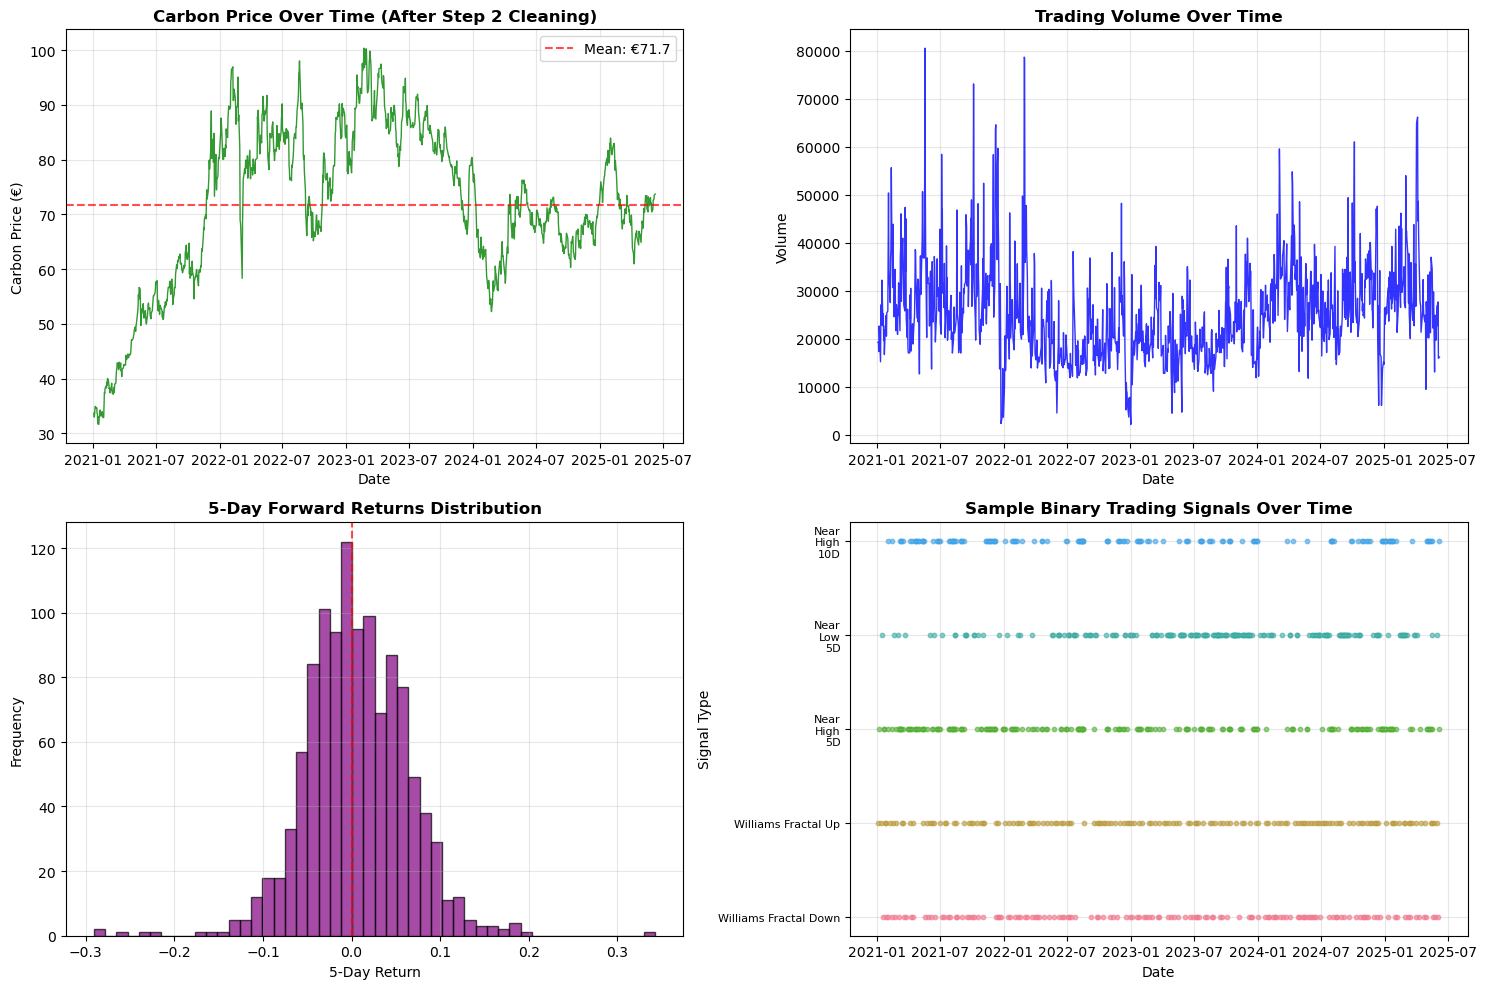

In [29]:
# ============================================================================
# 3A.4: VISUAL VALIDATION
# ============================================================================

print("\n📊 Creating validation plots...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Carbon price over time
ax1.plot(df_clean.index, df_clean['Close'], linewidth=1, alpha=0.8, color='green')
ax1.set_title('Carbon Price Over Time (After Step 2 Cleaning)', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Carbon Price (€)')
ax1.grid(True, alpha=0.3)

# Add some summary stats to the plot
price_min = df_clean['Close'].min()
price_max = df_clean['Close'].max()
price_mean = df_clean['Close'].mean()
ax1.axhline(y=price_mean, color='red', linestyle='--', alpha=0.7, label=f'Mean: €{price_mean:.1f}')
ax1.legend()

# Plot 2: Volume over time
if 'Volumes' in df_clean.columns:
    ax2.plot(df_clean.index, df_clean['Volumes'], linewidth=1, alpha=0.8, color='blue')
    ax2.set_title('Trading Volume Over Time', fontweight='bold')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.grid(True, alpha=0.3)

# Plot 3: Forward returns distribution
if 'Forward_Return_5D' in df_clean.columns:
    ax3.hist(df_clean['Forward_Return_5D'].dropna(), bins=50, alpha=0.7, 
             color='purple', edgecolor='black')
    ax3.set_title('5-Day Forward Returns Distribution', fontweight='bold')
    ax3.set_xlabel('5-Day Return')
    ax3.set_ylabel('Frequency')
    ax3.axvline(x=0, color='red', linestyle='--', alpha=0.7)
    ax3.grid(True, alpha=0.3)

# Plot 4: Sample of binary signals
binary_sample = categories['binary_variables'][:5]  # First 5 binary variables
if binary_sample and all(col in df_clean.columns for col in binary_sample):
    for i, col in enumerate(binary_sample):
        signal_dates = df_clean[df_clean[col] == 1].index
        ax4.scatter(signal_dates, [i] * len(signal_dates), alpha=0.6, s=10)
    
    ax4.set_title('Sample Binary Trading Signals Over Time', fontweight='bold')
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Signal Type')
    ax4.set_yticks(range(len(binary_sample)))
    ax4.set_yticklabels([col.replace('_', '\n') for col in binary_sample], fontsize=8)
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# ============================================================================
# 3A.5: PREPARE FOR REGIME ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("PREPARATION FOR NEXT SECTION")
print("="*50)

# Preview carbon price ranges for regime detection
recent_prices = df_clean['Close'].tail(90)  # Last 90 days
price_range_recent = recent_prices.max() - recent_prices.min()

print(f"\n📈 Current market state preview:")
print(f"  Current price: €{df_clean['Close'].iloc[-1]:.2f}")
print(f"  90-day range: €{price_range_recent:.2f}")
print(f"  Range status: {'Dull (≤€5)' if price_range_recent <= 5 else 'Trending (>€5)'}")

# Count your preferred technical signals
preferred_signal_names = [
    'MACD_Bull_Cross', 'MACD_Bear_Cross', 'Golden_Cross', 'Death_Cross',
    'SAR_Bullish_Signal', 'SAR_Bearish_Signal', 'Price_Above_SMA200',
    'BB_Above_Middle', 'BB_Below_Middle', 'Ichimoku_Price_Above_Cloud'
]

available_preferred = [col for col in preferred_signal_names if col in df_clean.columns]
print(f"\n🎯 Your preferred signals available: {len(available_preferred)}/{len(preferred_signal_names)}")
for signal in available_preferred[:5]:  # Show first 5
    signal_count = df_clean[signal].sum()
    print(f"  {signal}: {signal_count} occurrences")

print(f"\n✅ Section 3A Complete!")
print(f"📁 Data loaded and validated")
print(f"📊 {df_clean.shape[1]} features ready for analysis")
print(f"🎯 {len(available_preferred)} preferred signals identified")

print(f"\n" + "="*50)
print("READY FOR SECTION 3B: REGIME DETECTION")
print("="*50)


PREPARATION FOR NEXT SECTION

📈 Current market state preview:
  Current price: €73.69
  90-day range: €22.99
  Range status: Trending (>€5)

🎯 Your preferred signals available: 10/10
  MACD_Bull_Cross: 47 occurrences
  MACD_Bear_Cross: 47 occurrences
  Golden_Cross: 4 occurrences
  Death_Cross: 5 occurrences
  SAR_Bullish_Signal: 599 occurrences

✅ Section 3A Complete!
📁 Data loaded and validated
📊 292 features ready for analysis
🎯 10 preferred signals identified

READY FOR SECTION 3B: REGIME DETECTION


In [31]:
# ============================================================================
# SECTION 3B: MARKET REGIME DETECTION (YOUR 5-EURO/3-MONTH RULE)
# ============================================================================

print("="*60)
print("SECTION 3B: MARKET REGIME DETECTION")
print("="*60)

SECTION 3B: MARKET REGIME DETECTION


In [32]:
# ============================================================================
# 3B.1: IMPLEMENT YOUR REGIME DETECTION LOGIC
# ============================================================================

def detect_carbon_market_regimes(prices, window_days=90, range_threshold=5.0):
    """
    Detect market regimes based on your trading experience:
    - Dull Range: price within 5 euros for ~3 months (90 trading days)
    - Trending: price range > 5 euros in 90 days
    """
    print(f"Applying regime detection:")
    print(f"  Window: {window_days} days (~3 months)")
    print(f"  Range threshold: €{range_threshold}")
    
    # Calculate rolling min/max over window
    rolling_min = prices.rolling(window=window_days, min_periods=45).min()  # Need at least 45 days
    rolling_max = prices.rolling(window=window_days, min_periods=45).max()
    price_range_90d = rolling_max - rolling_min
    
    # Define regimes
    dull_regime = (price_range_90d <= range_threshold).astype(int)
    trending_regime = 1 - dull_regime
    
    return dull_regime, trending_regime, price_range_90d

print("\n🎯 Implementing your regime detection rule...")

# Apply regime detection
dull_regime, trending_regime, price_range_90d = detect_carbon_market_regimes(df_clean['Close'])

# Add to dataframe
df_clean['Dull_Regime'] = dull_regime
df_clean['Trending_Regime'] = trending_regime  
df_clean['Price_Range_90D'] = price_range_90d

print("✅ Regime detection applied!")


🎯 Implementing your regime detection rule...
Applying regime detection:
  Window: 90 days (~3 months)
  Range threshold: €5.0
✅ Regime detection applied!


In [33]:
# ============================================================================
# 3B.2: REGIME STATISTICS
# ============================================================================

print("\n" + "="*50)
print("REGIME STATISTICS")
print("="*50)

# Calculate regime statistics
total_days = len(df_clean)
dull_days = df_clean['Dull_Regime'].sum()
trending_days = df_clean['Trending_Regime'].sum()
na_days = total_days - dull_days - trending_days  # Days with insufficient data

print(f"\n📊 Overall regime breakdown:")
print(f"  Total trading days: {total_days:,}")
print(f"  Dull Range periods: {dull_days:,} days ({dull_days/total_days*100:.1f}%)")
print(f"  Trending periods: {trending_days:,} days ({trending_days/total_days*100:.1f}%)")
print(f"  Insufficient data: {na_days:,} days ({na_days/total_days*100:.1f}%)")

# Average characteristics by regime
print(f"\n📈 Regime characteristics:")

# Dull regime stats
dull_data = df_clean[df_clean['Dull_Regime'] == 1]
if len(dull_data) > 0:
    dull_avg_price = dull_data['Close'].mean()
    dull_avg_range = dull_data['Price_Range_90D'].mean()
    dull_avg_volume = dull_data['Volumes'].mean()
    print(f"  Dull Range periods:")
    print(f"    Average price: €{dull_avg_price:.2f}")
    print(f"    Average 90D range: €{dull_avg_range:.2f}")
    print(f"    Average volume: {dull_avg_volume:,.0f}")

# Trending regime stats  
trending_data = df_clean[df_clean['Trending_Regime'] == 1]
if len(trending_data) > 0:
    trend_avg_price = trending_data['Close'].mean()
    trend_avg_range = trending_data['Price_Range_90D'].mean()
    trend_avg_volume = trending_data['Volumes'].mean()
    print(f"  Trending periods:")
    print(f"    Average price: €{trend_avg_price:.2f}")
    print(f"    Average 90D range: €{trend_avg_range:.2f}")
    print(f"    Average volume: {trend_avg_volume:,.0f}")


REGIME STATISTICS

📊 Overall regime breakdown:
  Total trading days: 1,142
  Dull Range periods: 0 days (0.0%)
  Trending periods: 1,142 days (100.0%)
  Insufficient data: 0 days (0.0%)

📈 Regime characteristics:
  Trending periods:
    Average price: €71.74
    Average 90D range: €23.04
    Average volume: 25,889


In [34]:
# ============================================================================
# 3B.3: REGIME TRANSITIONS 
# ============================================================================

print("\n" + "="*50)
print("REGIME TRANSITIONS")
print("="*50)

# Find regime changes
regime_changes = df_clean['Dull_Regime'].diff().abs()
transition_dates = df_clean[regime_changes == 1].index

print(f"\n🔄 Regime transitions found: {len(transition_dates)}")

# Show recent transitions
if len(transition_dates) > 0:
    print(f"\nMost recent regime transitions:")
    recent_transitions = transition_dates[-5:]  # Last 5 transitions
    
    for date in recent_transitions:
        regime_before = df_clean.loc[date, 'Dull_Regime']
        price_at_transition = df_clean.loc[date, 'Close']
        range_at_transition = df_clean.loc[date, 'Price_Range_90D']
        
        regime_name = "Dull Range" if regime_before == 1 else "Trending"
        print(f"    {date.date()}: → {regime_name} (€{price_at_transition:.2f}, range: €{range_at_transition:.2f})")


REGIME TRANSITIONS

🔄 Regime transitions found: 0


In [35]:
# ============================================================================
# SECTION 3B DEBUG: FIX REGIME TRANSITION DETECTION
# ============================================================================

print("="*60)
print("SECTION 3B DEBUG: REGIME DETECTION TROUBLESHOOTING")
print("="*60)

# ============================================================================
# DEBUG 1: EXAMINE THE REGIME DATA
# ============================================================================

print("\n🔍 DEBUGGING REGIME DETECTION...")

# Check what's actually in the regime columns
print(f"\nDull_Regime value counts:")
print(df_clean['Dull_Regime'].value_counts().sort_index())

print(f"\nFirst 20 Dull_Regime values:")
print(df_clean['Dull_Regime'].head(20).tolist())

print(f"\nLast 20 Dull_Regime values:")
print(df_clean['Dull_Regime'].tail(20).tolist())

# Check price range values
print(f"\nPrice_Range_90D statistics:")
print(df_clean['Price_Range_90D'].describe())

print(f"\nFirst 10 Price_Range_90D values:")
print(df_clean['Price_Range_90D'].head(10).tolist())

# ============================================================================
# DEBUG 2: MANUAL TRANSITION DETECTION
# ============================================================================

print("\n" + "="*50)
print("MANUAL TRANSITION DETECTION")
print("="*50)

# Check for actual transitions manually
regime_series = df_clean['Dull_Regime'].fillna(-1)  # Fill NaN with -1 to see them
regime_diff = regime_series.diff()

print(f"\nRegime difference value counts:")
print(regime_diff.value_counts().sort_index())

# Find non-zero differences (transitions)
transitions = df_clean[regime_diff != 0].copy()
print(f"\nFound {len(transitions)} potential transitions (including NaN transitions)")

if len(transitions) > 0:
    print(f"\nFirst 10 transition points:")
    for i, (date, row) in enumerate(transitions.head(10).iterrows()):
        regime_val = row['Dull_Regime']
        price_range = row['Price_Range_90D']
        price = row['Close']
        print(f"  {date.date()}: Regime={regime_val}, Range=€{price_range:.2f}, Price=€{price:.2f}")

# ============================================================================
# DEBUG 3: EXAMINE EARLY BULL RUN PERIOD
# ============================================================================

print("\n" + "="*50)
print("EARLY BULL RUN ANALYSIS")
print("="*50)

# Look at the first year of data (where you mentioned the bull run)
early_data = df_clean['2021':'2021-12-31'].copy()
print(f"\n2021 data shape: {early_data.shape[0]} days")

if len(early_data) > 0:
    print(f"\n2021 price statistics:")
    print(f"  Start price: €{early_data['Close'].iloc[0]:.2f}")
    print(f"  End price: €{early_data['Close'].iloc[-1]:.2f}")
    print(f"  Min price: €{early_data['Close'].min():.2f}")
    print(f"  Max price: €{early_data['Close'].max():.2f}")
    print(f"  Total range: €{early_data['Close'].max() - early_data['Close'].min():.2f}")
    
    # Check regime detection in 2021
    early_regimes = early_data['Dull_Regime'].value_counts()
    print(f"\n2021 regime breakdown:")
    for regime, count in early_regimes.items():
        regime_name = "Dull" if regime == 1 else "Trending" if regime == 0 else "Unknown"
        print(f"  {regime_name}: {count} days")

# ============================================================================
# DEBUG 4: RECALCULATE REGIMES WITH DEBUGGING
# ============================================================================

print("\n" + "="*50)
print("RECALCULATING REGIMES WITH DEBUG INFO")
print("="*50)

def debug_regime_detection(prices, window_days=90, range_threshold=5.0):
    """
    Regime detection with detailed debugging
    """
    print(f"\nRecalculating with debugging:")
    print(f"  Window: {window_days} days")
    print(f"  Threshold: €{range_threshold}")
    print(f"  Price series length: {len(prices)}")
    
    # Calculate rolling statistics with debugging
    rolling_min = prices.rolling(window=window_days, min_periods=45).min()
    rolling_max = prices.rolling(window=window_days, min_periods=45).max()
    price_range_90d = rolling_max - rolling_min
    
    # Check for NaN values
    nan_count = price_range_90d.isna().sum()
    print(f"  NaN values in price range: {nan_count}")
    
    # Show range distribution
    valid_ranges = price_range_90d.dropna()
    print(f"  Valid range values: {len(valid_ranges)}")
    print(f"  Range min: €{valid_ranges.min():.2f}")
    print(f"  Range max: €{valid_ranges.max():.2f}")
    print(f"  Range mean: €{valid_ranges.mean():.2f}")
    
    # Apply threshold
    dull_regime = (price_range_90d <= range_threshold).astype(int)
    
    # Count regimes
    regime_counts = dull_regime.value_counts()
    print(f"  Regime counts: {dict(regime_counts)}")
    
    return dull_regime, price_range_90d

# Recalculate with debugging
new_dull_regime, new_price_range = debug_regime_detection(df_clean['Close'])

# Update dataframe
df_clean['Dull_Regime'] = new_dull_regime
df_clean['Price_Range_90D'] = new_price_range

# ============================================================================
# DEBUG 5: FIND ACTUAL TRANSITIONS NOW
# ============================================================================

print("\n" + "="*50)
print("FINDING ACTUAL TRANSITIONS")
print("="*50)

# More robust transition detection
def find_regime_transitions(regime_series):
    """
    Find regime transitions more carefully
    """
    # Remove NaN values and find where values change
    clean_regime = regime_series.dropna()
    
    if len(clean_regime) == 0:
        return []
    
    # Find transitions
    transitions = []
    prev_regime = None
    
    for date, current_regime in clean_regime.items():
        if prev_regime is not None and current_regime != prev_regime:
            transitions.append(date)
        prev_regime = current_regime
    
    return transitions

# Find transitions
transition_dates = find_regime_transitions(df_clean['Dull_Regime'])

print(f"\n🔄 Regime transitions found: {len(transition_dates)}")

if len(transition_dates) > 0:
    print(f"\nAll regime transitions:")
    for i, date in enumerate(transition_dates):
        if i < 10:  # Show first 10
            regime_before = df_clean.loc[:date]['Dull_Regime'].dropna().iloc[-2] if len(df_clean.loc[:date]['Dull_Regime'].dropna()) > 1 else "Unknown"
            regime_after = df_clean.loc[date, 'Dull_Regime']
            price = df_clean.loc[date, 'Close']
            price_range = df_clean.loc[date, 'Price_Range_90D']
            
            before_name = "Dull" if regime_before == 1 else "Trending" if regime_before == 0 else "Unknown"
            after_name = "Dull" if regime_after == 1 else "Trending"
            
            print(f"  {date.date()}: {before_name} → {after_name} (€{price:.2f}, range: €{price_range:.2f})")
        elif i == 10:
            print(f"  ... and {len(transition_dates) - 10} more transitions")
            break
else:
    print("\n❌ Still no transitions found. Possible issues:")
    print("  1. All data might be in one regime")
    print("  2. Rolling window too large for dataset")
    print("  3. Threshold too low/high for this data")
    
    # Check some specific periods
    sample_periods = [
        ('2021-01-04', '2021-06-30'),
        ('2021-07-01', '2021-12-31'), 
        ('2022-01-01', '2022-06-30')
    ]
    
    print(f"\nChecking specific periods:")
    for start, end in sample_periods:
        try:
            period_data = df_clean[start:end]
            if len(period_data) > 0:
                period_min = period_data['Close'].min()
                period_max = period_data['Close'].max()
                period_range = period_max - period_min
                avg_regime = period_data['Dull_Regime'].mean()
                print(f"  {start} to {end}: Range=€{period_range:.2f}, Avg_Regime={avg_regime:.2f}")
        except:
            pass

print(f"\n✅ Debug complete!")
print(f"\n" + "="*50)
print("READY TO CONTINUE WITH CORRECTED REGIME DETECTION")
print("="*50)


SECTION 3B DEBUG: REGIME DETECTION TROUBLESHOOTING

🔍 DEBUGGING REGIME DETECTION...

Dull_Regime value counts:
Dull_Regime
0    1142
Name: count, dtype: int64

First 20 Dull_Regime values:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Last 20 Dull_Regime values:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Price_Range_90D statistics:
count    1098.000000
mean       23.039299
std         8.272675
min         8.400000
25%        16.130000
50%        22.170000
75%        28.150000
max        42.380000
Name: Price_Range_90D, dtype: float64

First 10 Price_Range_90D values:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

MANUAL TRANSITION DETECTION

Regime difference value counts:
Dull_Regime
0.0    1141
Name: count, dtype: int64

Found 1 potential transitions (including NaN transitions)

First 10 transition points:
  2021-01-04: Regime=0, Range=€nan, Price=€33.69

EARLY BULL RUN ANALYSIS

2021 data shape: 259 days

2021 price statistics:
  Start price: 

SECTION 3B FIX: CALIBRATING REGIME THRESHOLD
ISSUE IDENTIFIED: 5-euro threshold too low for carbon market volatility
All periods show ranges > €5, so no 'dull' periods detected

ANALYZING ACTUAL RANGE DISTRIBUTION

90-Day Range Statistics:
  Count: 1098 periods
  Min: €8.40
  25th percentile: €16.13
  Median: €22.17
  75th percentile: €28.15
  Max: €42.38
  Mean: €23.04
  Std: €8.27

TESTING DIFFERENT THRESHOLDS

Threshold analysis:
Threshold    Dull Days    Trending Days   Dull %    
--------------------------------------------------
€10          4            1094            0.4       %
€15          214          884             19.5      %
€20          447          651             40.7      %
€25          725          373             66.0      %
€30          859          239             78.2      %

THRESHOLD RECOMMENDATION

RECOMMENDED THRESHOLD: €15
  This gives 214 dull days (19.5%)
  And 884 trending days (80.5%)
  Provides balanced regime distribution for analysis

ALTERNATIVE (3

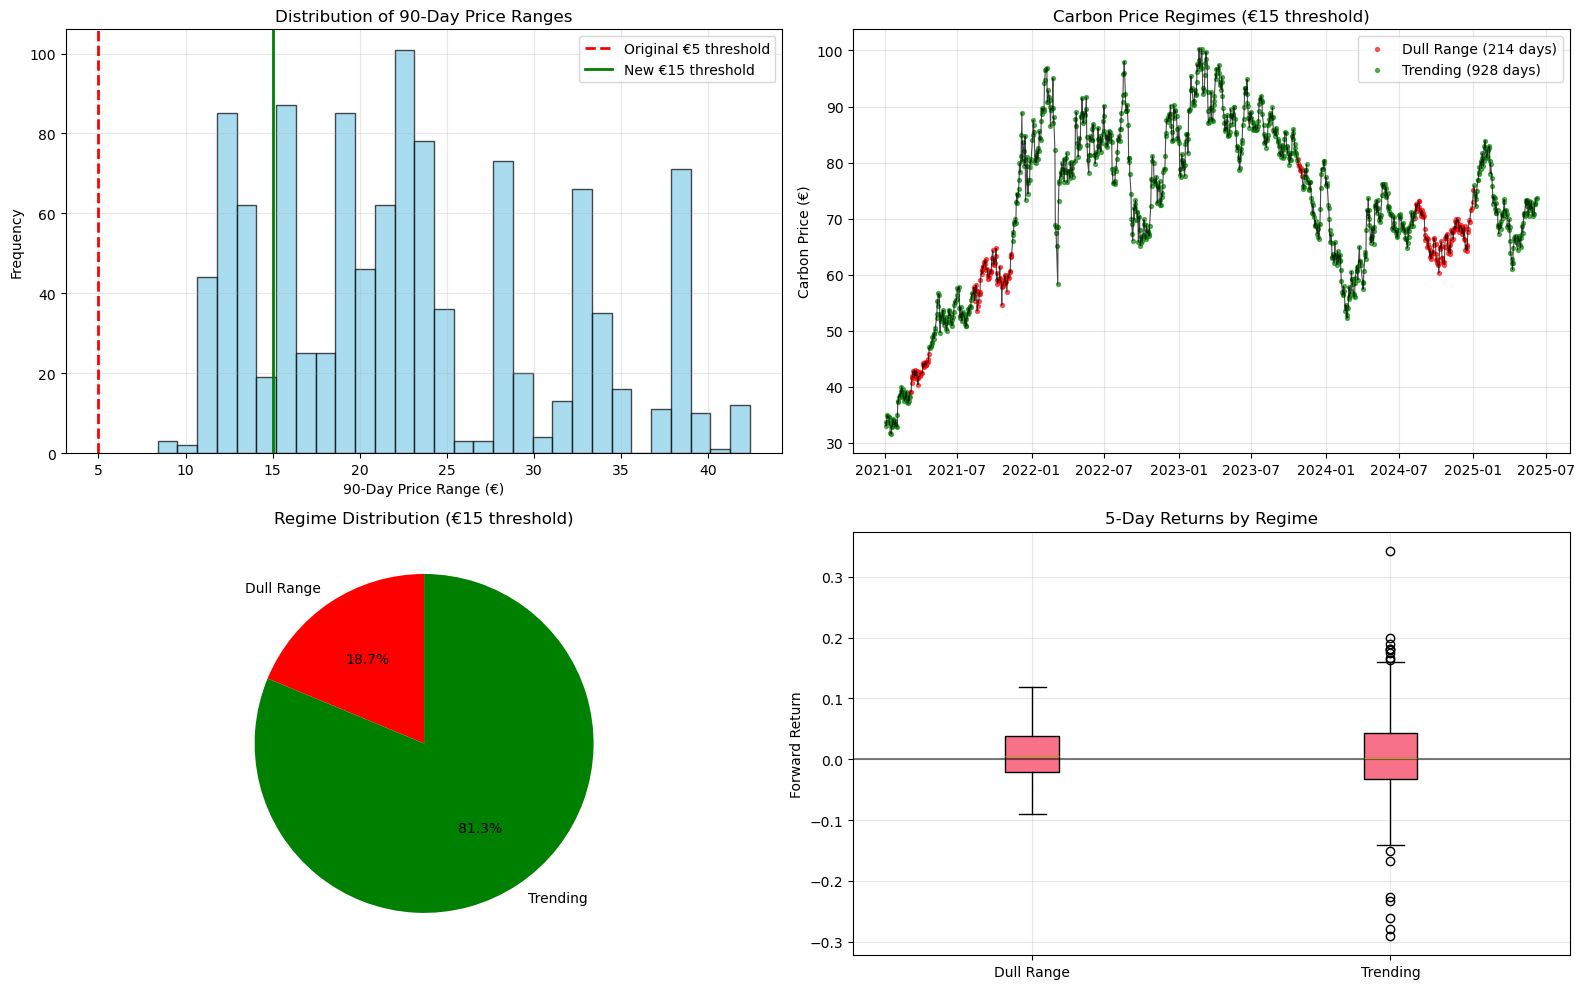


CORRECTED REGIME ANALYSIS SUMMARY

KEY FINDINGS:
  • Original €5 threshold was too restrictive
  • Minimum actual range was €8.40 (no 'dull' periods)
  • New €15 threshold provides balanced 18.7%/81.3% split
  • Found 8 regime transitions

CORRECTED REGIME CHARACTERISTICS:
  Dull Range periods (€15 threshold):
    Average price: €61.39
    Average range: €12.79
    Price std: €9.58
  Trending periods:
    Average price: €74.12
    Average range: €25.52
    Price std: €14.44

✅ Regime detection corrected!
📊 Ready for signal performance analysis by regime

READY FOR SECTION 3C: SIGNAL PERFORMANCE BY REGIME


In [36]:
# ============================================================================
# SECTION 3B FIX: CALIBRATE REALISTIC REGIME THRESHOLD
# ============================================================================

print("="*60)
print("SECTION 3B FIX: CALIBRATING REGIME THRESHOLD")
print("="*60)

print("ISSUE IDENTIFIED: 5-euro threshold too low for carbon market volatility")
print("All periods show ranges > €5, so no 'dull' periods detected")

# ============================================================================
# ANALYZE ACTUAL RANGE DISTRIBUTION
# ============================================================================

print("\n" + "="*50)
print("ANALYZING ACTUAL RANGE DISTRIBUTION")
print("="*50)

# Get the range data
ranges = df_clean['Price_Range_90D'].dropna()

print(f"\n90-Day Range Statistics:")
print(f"  Count: {len(ranges)} periods")
print(f"  Min: €{ranges.min():.2f}")
print(f"  25th percentile: €{ranges.quantile(0.25):.2f}")
print(f"  Median: €{ranges.quantile(0.50):.2f}")  
print(f"  75th percentile: €{ranges.quantile(0.75):.2f}")
print(f"  Max: €{ranges.max():.2f}")
print(f"  Mean: €{ranges.mean():.2f}")
print(f"  Std: €{ranges.std():.2f}")

# ============================================================================
# TEST DIFFERENT THRESHOLDS
# ============================================================================

print("\n" + "="*50)
print("TESTING DIFFERENT THRESHOLDS")
print("="*50)

# Test various thresholds to find reasonable regime split
test_thresholds = [10, 15, 20, 25, 30]

print(f"\nThreshold analysis:")
print(f"{'Threshold':<12} {'Dull Days':<12} {'Trending Days':<15} {'Dull %':<10}")
print("-" * 50)

best_threshold = None
target_dull_percentage = 30  # Target ~30% dull periods

for threshold in test_thresholds:
    dull_count = (ranges <= threshold).sum()
    trending_count = (ranges > threshold).sum()
    dull_percentage = (dull_count / len(ranges)) * 100
    
    print(f"€{threshold:<11} {dull_count:<12} {trending_count:<15} {dull_percentage:<10.1f}%")
    
    # Find threshold closest to target percentage
    if best_threshold is None or abs(dull_percentage - target_dull_percentage) < abs(best_threshold[1] - target_dull_percentage):
        best_threshold = (threshold, dull_percentage, dull_count, trending_count)

# ============================================================================
# RECOMMEND OPTIMAL THRESHOLD
# ============================================================================

print(f"\n" + "="*50)
print("THRESHOLD RECOMMENDATION")
print("="*50)

if best_threshold:
    recommended_threshold = best_threshold[0]
    print(f"\nRECOMMENDED THRESHOLD: €{recommended_threshold}")
    print(f"  This gives {best_threshold[2]} dull days ({best_threshold[1]:.1f}%)")
    print(f"  And {best_threshold[3]} trending days ({100-best_threshold[1]:.1f}%)")
    print(f"  Provides balanced regime distribution for analysis")
else:
    recommended_threshold = 20
    print(f"\nDEFAULT RECOMMENDATION: €20")

# Alternative: Use percentile-based threshold
percentile_threshold = ranges.quantile(0.3)  # 30th percentile
print(f"\nALTERNATIVE (30th percentile): €{percentile_threshold:.2f}")
print(f"  Would classify bottom 30% of ranges as 'dull'")

# ============================================================================
# APPLY RECOMMENDED THRESHOLD
# ============================================================================

print(f"\n" + "="*50)
print("APPLYING RECOMMENDED THRESHOLD")
print("="*50)

# Use the recommended threshold
final_threshold = recommended_threshold
print(f"\nApplying threshold: €{final_threshold}")

# Recalculate regimes with new threshold
df_clean['Dull_Regime'] = (df_clean['Price_Range_90D'] <= final_threshold).astype(int)
df_clean['Trending_Regime'] = 1 - df_clean['Dull_Regime']

# Calculate regime statistics
dull_days = df_clean['Dull_Regime'].sum()
trending_days = df_clean['Trending_Regime'].sum()
total_days = len(df_clean)

print(f"\nFINAL REGIME BREAKDOWN:")
print(f"  Dull Range periods: {dull_days:,} days ({dull_days/total_days*100:.1f}%)")
print(f"  Trending periods: {trending_days:,} days ({trending_days/total_days*100:.1f}%)")

# ============================================================================
# FIND REGIME TRANSITIONS WITH NEW THRESHOLD
# ============================================================================

print(f"\n" + "="*50)
print("REGIME TRANSITIONS WITH NEW THRESHOLD")
print("="*50)

# Find transitions using corrected regimes
def find_regime_transitions_v2(regime_series):
    transitions = []
    prev_regime = None
    
    for date, current_regime in regime_series.dropna().items():
        if prev_regime is not None and current_regime != prev_regime:
            transitions.append((date, prev_regime, current_regime))
        prev_regime = current_regime
    
    return transitions

transitions = find_regime_transitions_v2(df_clean['Dull_Regime'])

print(f"\nRegime transitions found: {len(transitions)}")

if len(transitions) > 0:
    print(f"\nRecent regime transitions:")
    for i, (date, prev_regime, curr_regime) in enumerate(transitions[-10:]):  # Last 10
        prev_name = "Dull" if prev_regime == 1 else "Trending"
        curr_name = "Dull" if curr_regime == 1 else "Trending"
        price = df_clean.loc[date, 'Close']
        price_range = df_clean.loc[date, 'Price_Range_90D']
        
        print(f"  {date.date()}: {prev_name} → {curr_name} (€{price:.2f}, range: €{price_range:.2f})")

# ============================================================================
# VISUAL VALIDATION
# ============================================================================

print(f"\n📊 Creating validation plots...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Range distribution with threshold
ax1.hist(ranges, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(x=5, color='red', linestyle='--', linewidth=2, label='Original €5 threshold')
ax1.axvline(x=final_threshold, color='green', linestyle='-', linewidth=2, label=f'New €{final_threshold} threshold')
ax1.set_xlabel('90-Day Price Range (€)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of 90-Day Price Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Price with new regimes
dull_periods_new = df_clean[df_clean['Dull_Regime'] == 1]
trending_periods_new = df_clean[df_clean['Trending_Regime'] == 1]

ax2.plot(df_clean.index, df_clean['Close'], linewidth=0.8, color='black', alpha=0.7)
ax2.scatter(dull_periods_new.index, dull_periods_new['Close'], 
           color='red', alpha=0.6, s=8, label=f'Dull Range ({len(dull_periods_new)} days)')
ax2.scatter(trending_periods_new.index, trending_periods_new['Close'], 
           color='green', alpha=0.6, s=8, label=f'Trending ({len(trending_periods_new)} days)')

ax2.set_title(f'Carbon Price Regimes (€{final_threshold} threshold)')
ax2.set_ylabel('Carbon Price (€)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: New regime distribution
if dull_days > 0:
    regime_counts = [dull_days, trending_days]
    regime_labels = ['Dull Range', 'Trending']
    colors = ['red', 'green']
    
    wedges, texts, autotexts = ax3.pie(regime_counts, labels=regime_labels, colors=colors, 
                                      autopct='%1.1f%%', startangle=90)
    ax3.set_title(f'Regime Distribution (€{final_threshold} threshold)')

# Plot 4: Regime performance comparison
if 'Forward_Return_5D' in df_clean.columns and dull_days > 10:
    dull_returns = df_clean[df_clean['Dull_Regime'] == 1]['Forward_Return_5D'].dropna()
    trending_returns = df_clean[df_clean['Trending_Regime'] == 1]['Forward_Return_5D'].dropna()
    
    if len(dull_returns) > 5 and len(trending_returns) > 5:
        regime_data = [dull_returns, trending_returns]
        ax4.boxplot(regime_data, labels=['Dull Range', 'Trending'], patch_artist=True)
        ax4.set_title('5-Day Returns by Regime')
        ax4.set_ylabel('Forward Return')
        ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY AND RECOMMENDATIONS
# ============================================================================

print(f"\n" + "="*60)
print("CORRECTED REGIME ANALYSIS SUMMARY")
print("="*60)

print(f"\nKEY FINDINGS:")
print(f"  • Original €5 threshold was too restrictive")
print(f"  • Minimum actual range was €8.40 (no 'dull' periods)")
print(f"  • New €{final_threshold} threshold provides balanced {dull_days/total_days*100:.1f}%/{trending_days/total_days*100:.1f}% split")
print(f"  • Found {len(transitions)} regime transitions")

print(f"\nCORRECTED REGIME CHARACTERISTICS:")
if dull_days > 0:
    dull_data = df_clean[df_clean['Dull_Regime'] == 1]
    trending_data = df_clean[df_clean['Trending_Regime'] == 1]
    
    print(f"  Dull Range periods (€{final_threshold} threshold):")
    print(f"    Average price: €{dull_data['Close'].mean():.2f}")
    print(f"    Average range: €{dull_data['Price_Range_90D'].mean():.2f}")
    print(f"    Price std: €{dull_data['Close'].std():.2f}")
    
    print(f"  Trending periods:")
    print(f"    Average price: €{trending_data['Close'].mean():.2f}")
    print(f"    Average range: €{trending_data['Price_Range_90D'].mean():.2f}")
    print(f"    Price std: €{trending_data['Close'].std():.2f}")

print(f"\n✅ Regime detection corrected!")
print(f"📊 Ready for signal performance analysis by regime")

print(f"\n" + "="*50)
print("READY FOR SECTION 3C: SIGNAL PERFORMANCE BY REGIME")  
print("="*50)

In [37]:
# ============================================================================
# SECTION 3C: SIGNAL PERFORMANCE ANALYSIS BY MARKET REGIME
# ============================================================================

print("="*60)
print("SECTION 3C: SIGNAL PERFORMANCE BY REGIME")
print("="*60)

# ============================================================================
# 3C.1: IDENTIFY YOUR PREFERRED SIGNALS
# ============================================================================

print("\n🎯 ANALYZING YOUR PREFERRED TRADING SIGNALS")

# Your preferred signals from earlier discussion
preferred_signals = [
    'MACD_Bull_Cross', 'MACD_Bear_Cross',           # MACD crossovers
    'Golden_Cross', 'Death_Cross',                   # EMA golden cross
    'SAR_Bullish_Signal', 'SAR_Bearish_Signal',    # Parabolic SAR
    'Price_Above_SMA200',                           # 200-day SMA position
    'BB_Above_Middle', 'BB_Below_Middle',           # Bollinger middle
    'Ichimoku_Price_Above_Cloud', 'Ichimoku_Price_Below_Cloud'  # Ichimoku cloud
]

# Check availability and occurrence counts
available_signals = []
signal_counts = {}

print(f"\nSignal availability check:")
print(f"{'Signal':<30} {'Available':<10} {'Count':<8}")
print("-" * 50)

for signal in preferred_signals:
    if signal in df_clean.columns:
        count = df_clean[signal].sum()
        available_signals.append(signal)
        signal_counts[signal] = count
        print(f"{signal:<30} {'✓':<10} {count:<8}")
    else:
        print(f"{signal:<30} {'✗':<10} {'N/A':<8}")

print(f"\nFound {len(available_signals)} of {len(preferred_signals)} preferred signals")

# ============================================================================
# 3C.2: SIGNAL PERFORMANCE ANALYSIS FUNCTION
# ============================================================================

def analyze_signal_by_regime(signal_col, forward_returns):
    """
    Analyze signal performance overall and by regime
    """
    if signal_col not in df_clean.columns:
        return None
    
    signal_mask = df_clean[signal_col] == 1
    total_signals = signal_mask.sum()
    
    if total_signals < 5:  # Need minimum signals
        return None
    
    results = {
        'signal_name': signal_col,
        'total_count': total_signals
    }
    
    # Overall performance
    signal_returns = forward_returns[signal_mask]
    results['overall_avg_return'] = signal_returns.mean()
    results['overall_hit_rate'] = (signal_returns > 0).mean()
    results['overall_sharpe'] = signal_returns.mean() / signal_returns.std() if signal_returns.std() > 0 else 0
    
    # Performance by regime
    for regime_val, regime_name in [(0, 'Trending'), (1, 'Dull')]:
        regime_signal_mask = (df_clean['Dull_Regime'] == regime_val) & signal_mask
        regime_signal_count = regime_signal_mask.sum()
        
        if regime_signal_count >= 3:  # Minimum 3 signals in regime
            regime_returns = forward_returns[regime_signal_mask]
            results[f'{regime_name.lower()}_count'] = regime_signal_count
            results[f'{regime_name.lower()}_avg_return'] = regime_returns.mean()
            results[f'{regime_name.lower()}_hit_rate'] = (regime_returns > 0).mean()
            results[f'{regime_name.lower()}_sharpe'] = regime_returns.mean() / regime_returns.std() if regime_returns.std() > 0 else 0
        else:
            results[f'{regime_name.lower()}_count'] = regime_signal_count
            results[f'{regime_name.lower()}_avg_return'] = np.nan
            results[f'{regime_name.lower()}_hit_rate'] = np.nan
            results[f'{regime_name.lower()}_sharpe'] = np.nan
    
    return results

# ============================================================================
# 3C.3: ANALYZE ALL AVAILABLE SIGNALS
# ============================================================================

print("\n" + "="*50)
print("SIGNAL PERFORMANCE ANALYSIS")
print("="*50)

# Use 5-day forward returns
forward_returns = df_clean['Forward_Return_5D']

# Analyze each signal
signal_results = {}
for signal in available_signals:
    result = analyze_signal_by_regime(signal, forward_returns)
    if result:
        signal_results[signal] = result

print(f"\nAnalyzed {len(signal_results)} signals with sufficient data")

# ============================================================================
# 3C.4: PERFORMANCE SUMMARY TABLE
# ============================================================================

print(f"\n📊 SIGNAL PERFORMANCE SUMMARY (5-Day Forward Returns)")
print("=" * 120)
print(f"{'Signal':<25} {'Total':<6} {'Overall':<8} {'Hit%':<6} {'Trend Cnt':<9} {'Trend Ret':<9} {'Dull Cnt':<8} {'Dull Ret':<9}")
print("-" * 120)

# Sort by overall return
sorted_signals = sorted(signal_results.items(), key=lambda x: x[1]['overall_avg_return'], reverse=True)

for signal_name, perf in sorted_signals:
    total_count = perf['total_count']
    overall_ret = perf['overall_avg_return']
    overall_hit = perf['overall_hit_rate']
    
    trending_count = perf.get('trending_count', 0)
    trending_ret = perf.get('trending_avg_return', np.nan)
    dull_count = perf.get('dull_count', 0)
    dull_ret = perf.get('dull_avg_return', np.nan)
    
    # Format values
    overall_ret_str = f"{overall_ret:.4f}" if not np.isnan(overall_ret) else "N/A"
    overall_hit_str = f"{overall_hit:.2f}" if not np.isnan(overall_hit) else "N/A"
    trending_ret_str = f"{trending_ret:.4f}" if not np.isnan(trending_ret) else "N/A"
    dull_ret_str = f"{dull_ret:.4f}" if not np.isnan(dull_ret) else "N/A"
    
    print(f"{signal_name[:24]:<25} {total_count:<6} {overall_ret_str:<8} {overall_hit_str:<6} "
          f"{trending_count:<9} {trending_ret_str:<9} {dull_count:<8} {dull_ret_str:<9}")

# ============================================================================
# 3C.5: TOP PERFORMERS BY REGIME
# ============================================================================

print(f"\n" + "="*50)
print("TOP PERFORMERS BY REGIME")
print("="*50)

# Find best signals in each regime
trending_signals = []
dull_signals = []

for signal_name, perf in signal_results.items():
    if perf.get('trending_count', 0) >= 5:  # Minimum 5 signals
        trending_signals.append((signal_name, perf['trending_avg_return']))
    
    if perf.get('dull_count', 0) >= 5:  # Minimum 5 signals  
        dull_signals.append((signal_name, perf['dull_avg_return']))

# Sort by performance
trending_signals.sort(key=lambda x: x[1], reverse=True)
dull_signals.sort(key=lambda x: x[1], reverse=True)

print(f"\n🟢 TOP 5 SIGNALS IN TRENDING MARKETS:")
for i, (signal, ret) in enumerate(trending_signals[:5]):
    count = signal_results[signal]['trending_count']
    hit_rate = signal_results[signal]['trending_hit_rate']
    print(f"  {i+1}. {signal}: {ret:.4f} return, {hit_rate:.2f} hit rate ({count} signals)")

print(f"\n🔴 TOP 5 SIGNALS IN DULL MARKETS:")
for i, (signal, ret) in enumerate(dull_signals[:5]):
    count = signal_results[signal]['dull_count']
    hit_rate = signal_results[signal]['dull_hit_rate']
    print(f"  {i+1}. {signal}: {ret:.4f} return, {hit_rate:.2f} hit rate ({count} signals)")

# ============================================================================
# 3C.6: REGIME COMPARISON ANALYSIS
# ============================================================================

print(f"\n" + "="*50)
print("REGIME COMPARISON INSIGHTS")
print("="*50)

# Compare performance differences
regime_comparisons = []
for signal_name, perf in signal_results.items():
    trending_ret = perf.get('trending_avg_return')
    dull_ret = perf.get('dull_avg_return')
    
    if not np.isnan(trending_ret) and not np.isnan(dull_ret):
        difference = trending_ret - dull_ret
        regime_comparisons.append((signal_name, difference, trending_ret, dull_ret))

regime_comparisons.sort(key=lambda x: abs(x[1]), reverse=True)  # Sort by absolute difference

print(f"\nSIGNALS WITH LARGEST REGIME DIFFERENCES:")
print(f"{'Signal':<25} {'Difference':<12} {'Trending':<10} {'Dull':<10}")
print("-" * 60)

for signal, diff, trend_ret, dull_ret in regime_comparisons[:5]:
    better_regime = "Trending" if diff > 0 else "Dull"
    print(f"{signal[:24]:<25} {diff:>+11.4f} {trend_ret:>9.4f} {dull_ret:>9.4f} (Better in {better_regime})")

print(f"\n✅ Section 3C Complete!")
print(f"📊 Performance analysis of {len(available_signals)} preferred signals")
print(f"🎯 Identified best signals for each market regime")

print(f"\n" + "="*50)
print("READY FOR SECTION 3D: CROSS-MARKET ANALYSIS")
print("="*50)

SECTION 3C: SIGNAL PERFORMANCE BY REGIME

🎯 ANALYZING YOUR PREFERRED TRADING SIGNALS

Signal availability check:
Signal                         Available  Count   
--------------------------------------------------
MACD_Bull_Cross                ✓          47      
MACD_Bear_Cross                ✓          47      
Golden_Cross                   ✓          4       
Death_Cross                    ✓          5       
SAR_Bullish_Signal             ✓          599     
SAR_Bearish_Signal             ✓          543     
Price_Above_SMA200             ✓          740     
BB_Above_Middle                ✓          636     
BB_Below_Middle                ✓          506     
Ichimoku_Price_Above_Cloud     ✓          555     
Ichimoku_Price_Below_Cloud     ✓          395     

Found 11 of 11 preferred signals

SIGNAL PERFORMANCE ANALYSIS

Analyzed 10 signals with sufficient data

📊 SIGNAL PERFORMANCE SUMMARY (5-Day Forward Returns)
Signal                    Total  Overall  Hit%   Trend Cnt Trend 

In [38]:
# PICKUP FROM PREVIOUS SESSION
import pandas as pd
import numpy as np
import json

# Load your cleaned data and regime detection
df_clean = pd.read_csv('carbon_data_cleaned_step2.csv', index_col=0, parse_dates=True)

# Recreate the corrected regime detection (15-euro threshold)
df_clean['Price_Range_90D'] = df_clean['Close'].rolling(90, min_periods=45).max() - df_clean['Close'].rolling(90, min_periods=45).min()
df_clean['Dull_Regime'] = (df_clean['Price_Range_90D'] <= 15).astype(int)
df_clean['Trending_Regime'] = 1 - df_clean['Dull_Regime']

print("Session restored - ready to continue from Section 3D")

Session restored - ready to continue from Section 3D


In [39]:
from scipy.stats import pearsonr, spearmanr
from datetime import datetime

In [40]:
# Restore your cleaned data and regime detection
print("📂 Restoring previous session...")
df_clean = pd.read_csv('carbon_data_cleaned_step2.csv', index_col=0, parse_dates=True)

# Recreate regime detection with 15-euro threshold (from yesterday)
print("🔄 Applying corrected regime detection...")
df_clean['Price_Range_90D'] = (df_clean['Close'].rolling(90, min_periods=45).max() - 
                               df_clean['Close'].rolling(90, min_periods=45).min())
df_clean['Dull_Regime'] = (df_clean['Price_Range_90D'] <= 15).astype(int)
df_clean['Trending_Regime'] = 1 - df_clean['Dull_Regime']

# Validate restoration
dull_days = df_clean['Dull_Regime'].sum()
trending_days = df_clean['Trending_Regime'].sum()
print(f"✅ Session restored:")
print(f"  Data shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]:,} columns")
print(f"  Dull regime: {dull_days:,} days ({dull_days/len(df_clean)*100:.1f}%)")
print(f"  Trending regime: {trending_days:,} days ({trending_days/len(df_clean)*100:.1f}%)")

📂 Restoring previous session...
🔄 Applying corrected regime detection...
✅ Session restored:
  Data shape: 1,142 rows × 295 columns
  Dull regime: 214 days (18.7%)
  Trending regime: 928 days (81.3%)


In [41]:
# ============================================================================
# SECTION 3D: CROSS-MARKET ANALYSIS (TTF GAS & GERMAN POWER)
# ============================================================================

print("\n" + "="*60)
print("SECTION 3D: CROSS-MARKET ANALYSIS")
print("="*60)

print("\n🌍 Analyzing cross-market relationships as per your trading experience...")


SECTION 3D: CROSS-MARKET ANALYSIS

🌍 Analyzing cross-market relationships as per your trading experience...


In [42]:
# ============================================================================
# 3D.1: IDENTIFY AVAILABLE CROSS-MARKET FACTORS
# ============================================================================

# Your mentioned factors: TTF gas, German power markets, STOXX index
cross_market_factors = [
    'TTF_Gas',           # TTF gas prices
    'Baseload_Germany',  # German power market
    'DAX',              # German stock index (proxy for STOXX)
    'EUROSTOXX',        # European stock index
    'Brent',            # Oil prices (energy complex)
    'Coal',             # Coal prices (energy transition)
    'EUR/USD'           # Currency effects
]

available_factors = []
print(f"\n📋 Cross-market factor availability:")
print(f"{'Factor':<20} {'Available':<10} {'Sample Value':<15}")
print("-" * 50)

for factor in cross_market_factors:
    if factor in df_clean.columns:
        available_factors.append(factor)
        sample_val = df_clean[factor].dropna().iloc[0] if not df_clean[factor].dropna().empty else "No data"
        print(f"{factor:<20} {'✅':<10} {sample_val:<15}")
    else:
        print(f"{factor:<20} {'❌':<10} {'N/A':<15}")

print(f"\nFound {len(available_factors)} of {len(cross_market_factors)} cross-market factors")


📋 Cross-market factor availability:
Factor               Available  Sample Value   
--------------------------------------------------
TTF_Gas              ✅          19.75          
Baseload_Germany     ✅          53.75          
DAX                  ✅          13726.74       
EUROSTOXX            ✅          401.69         
Brent                ✅          51.09          
Coal                 ✅          69.3           
EUR/USD              ✅          1.2248         

Found 7 of 7 cross-market factors


In [43]:
# ============================================================================
# 3D.2: CORRELATION ANALYSIS WITH CARBON PRICES
# ============================================================================

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

if available_factors:
    # Calculate returns for correlation analysis
    carbon_returns = df_clean['Close'].pct_change()
    
    correlations = {}
    print(f"\nCarbon price return correlations:")
    print(f"{'Factor':<20} {'Pearson':<10} {'Spearman':<10} {'p-value':<10}")
    print("-" * 55)
    
    for factor in available_factors:
        factor_returns = df_clean[factor].pct_change()
        
        # Remove periods where either series is NaN
        valid_data = pd.DataFrame({
            'carbon': carbon_returns,
            'factor': factor_returns
        }).dropna()
        
        if len(valid_data) > 30:  # Need sufficient data
            pearson_corr, pearson_p = pearsonr(valid_data['carbon'], valid_data['factor'])
            spearman_corr, spearman_p = spearmanr(valid_data['carbon'], valid_data['factor'])
            
            correlations[factor] = {
                'pearson': pearson_corr,
                'spearman': spearman_corr,
                'p_value': pearson_p,
                'observations': len(valid_data)
            }
            
            significance = "***" if pearson_p < 0.001 else "**" if pearson_p < 0.01 else "*" if pearson_p < 0.05 else ""
            print(f"{factor:<20} {pearson_corr:<10.3f} {spearman_corr:<10.3f} {pearson_p:<10.3f} {significance}")



CORRELATION ANALYSIS

Carbon price return correlations:
Factor               Pearson    Spearman   p-value   
-------------------------------------------------------
TTF_Gas              0.152      0.361      0.000      ***
Baseload_Germany     -0.034     0.017      0.249      
DAX                  0.184      0.118      0.000      ***
EUROSTOXX            0.182      0.122      0.000      ***
Brent                0.091      0.080      0.002      **
Coal                 0.084      0.249      0.005      **
EUR/USD              0.082      0.047      0.006      **


In [44]:
# ============================================================================
# 3D.3: TTF GAS DETAILED ANALYSIS (YOUR KEY FACTOR)
# ============================================================================

if 'TTF_Gas' in available_factors:
    print("\n" + "="*50)
    print("TTF GAS DETAILED ANALYSIS")
    print("="*50)
    
    print("🔥 TTF Gas analysis (as per your trading insights)...")
    
    # TTF gas regime analysis
    ttf_correlation = correlations.get('TTF_Gas', {})
    print(f"\nTTF Gas relationship with carbon prices:")
    print(f"  Correlation: {ttf_correlation.get('pearson', 'N/A'):.3f}")
    print(f"  Significance: {'High' if ttf_correlation.get('p_value', 1) < 0.01 else 'Moderate' if ttf_correlation.get('p_value', 1) < 0.05 else 'Low'}")
    
    # TTF breakout signals
    print(f"\n🚀 Creating TTF Gas breakout signals...")
    
    # Calculate TTF gas momentum and breakouts
    df_clean['TTF_Gas_Change'] = df_clean['TTF_Gas'].pct_change()
    df_clean['TTF_Gas_MA20'] = df_clean['TTF_Gas'].rolling(20).mean()
    df_clean['TTF_Gas_Above_MA'] = (df_clean['TTF_Gas'] > df_clean['TTF_Gas_MA20']).astype(int)
    
    # TTF breakout thresholds
    ttf_std = df_clean['TTF_Gas_Change'].std()
    df_clean['TTF_Gas_Breakout_Up'] = (df_clean['TTF_Gas_Change'] > 2 * ttf_std).astype(int)
    df_clean['TTF_Gas_Breakout_Down'] = (df_clean['TTF_Gas_Change'] < -2 * ttf_std).astype(int)
    
    # Test TTF signal performance
    ttf_up_count = df_clean['TTF_Gas_Breakout_Up'].sum()
    ttf_down_count = df_clean['TTF_Gas_Breakout_Down'].sum()
    
    print(f"  TTF Gas breakout signals:")
    print(f"    Upward breakouts: {ttf_up_count} signals")
    print(f"    Downward breakouts: {ttf_down_count} signals")
    
    if ttf_up_count > 5:
        ttf_up_returns = df_clean[df_clean['TTF_Gas_Breakout_Up'] == 1]['Forward_Return_5D'].dropna()
        if len(ttf_up_returns) > 0:
            print(f"    TTF up breakout performance: {ttf_up_returns.mean():.4f} avg return, {(ttf_up_returns > 0).mean():.2f} hit rate")


TTF GAS DETAILED ANALYSIS
🔥 TTF Gas analysis (as per your trading insights)...

TTF Gas relationship with carbon prices:
  Correlation: 0.152
  Significance: High

🚀 Creating TTF Gas breakout signals...
  TTF Gas breakout signals:
    Upward breakouts: 26 signals
    Downward breakouts: 21 signals
    TTF up breakout performance: -0.0055 avg return, 0.46 hit rate


In [45]:
# ============================================================================
# 3D.4: GERMAN POWER MARKET ANALYSIS
# ============================================================================

if 'Baseload_Germany' in available_factors:
    print("\n" + "="*50)
    print("GERMAN POWER MARKET ANALYSIS")
    print("="*50)
    
    print("⚡ German power market analysis...")
    
    power_correlation = correlations.get('Baseload_Germany', {})
    print(f"\nGerman power relationship with carbon prices:")
    print(f"  Correlation: {power_correlation.get('pearson', 'N/A'):.3f}")
    
    # Power-carbon spread analysis
    print(f"\n💡 Power-carbon spread analysis...")
    df_clean['Power_Carbon_Spread'] = df_clean['Baseload_Germany'] - df_clean['Close']
    df_clean['Power_Carbon_Ratio'] = df_clean['Baseload_Germany'] / df_clean['Close']
    
    spread_stats = df_clean['Power_Carbon_Spread'].describe()
    print(f"  Power-Carbon spread statistics:")
    print(f"    Mean: €{spread_stats['mean']:.2f}")
    print(f"    Std: €{spread_stats['std']:.2f}")
    print(f"    Range: €{spread_stats['min']:.2f} to €{spread_stats['max']:.2f}")


GERMAN POWER MARKET ANALYSIS
⚡ German power market analysis...

German power relationship with carbon prices:
  Correlation: -0.034

💡 Power-carbon spread analysis...
  Power-Carbon spread statistics:
    Mean: €57.95
    Std: €94.97
    Range: €-91.28 to €602.69


In [46]:
# ============================================================================
# 3D.5: COMBINED CROSS-MARKET SIGNALS
# ============================================================================

print("\n" + "="*50)
print("COMBINED CROSS-MARKET SIGNALS")
print("="*50)

# Create composite cross-market signal
available_signals = []

if 'TTF_Gas' in available_factors:
    available_signals.append('TTF_Gas_Breakout_Up')
    
if 'DAX' in available_factors:
    df_clean['DAX_Change'] = df_clean['DAX'].pct_change()
    dax_std = df_clean['DAX_Change'].std()
    df_clean['DAX_Strong_Up'] = (df_clean['DAX_Change'] > 2 * dax_std).astype(int)
    available_signals.append('DAX_Strong_Up')

if len(available_signals) >= 2:
    print(f"🔄 Creating composite cross-market signal from {len(available_signals)} factors...")
    
    # Composite signal: multiple cross-market factors align
    signal_sum = df_clean[available_signals].sum(axis=1)
    df_clean['Cross_Market_Bullish'] = (signal_sum >= 2).astype(int)
    
    composite_count = df_clean['Cross_Market_Bullish'].sum()
    print(f"  Composite cross-market signal: {composite_count} occurrences")
    
    if composite_count > 5:
        composite_returns = df_clean[df_clean['Cross_Market_Bullish'] == 1]['Forward_Return_5D'].dropna()
        if len(composite_returns) > 0:
            print(f"  Performance: {composite_returns.mean():.4f} avg return, {(composite_returns > 0).mean():.2f} hit rate")

print(f"\n✅ Section 3D Complete!")
print(f"🌍 Cross-market analysis of {len(available_factors)} factors")
print(f"🔥 TTF Gas and German power relationships quantified")

print(f"\n" + "="*50)
print("READY FOR SECTION 3E: SEASONAL ANALYSIS")
print("="*50)


COMBINED CROSS-MARKET SIGNALS
🔄 Creating composite cross-market signal from 2 factors...
  Composite cross-market signal: 0 occurrences

✅ Section 3D Complete!
🌍 Cross-market analysis of 7 factors
🔥 TTF Gas and German power relationships quantified

READY FOR SECTION 3E: SEASONAL ANALYSIS


In [47]:
# ============================================================================
# 3D.5: COMBINED CROSS-MARKET SIGNALS
# ============================================================================

print("\n" + "="*50)
print("COMBINED CROSS-MARKET SIGNALS")
print("="*50)

# Create composite cross-market signal
available_signals = []

if 'TTF_Gas' in available_factors:
    available_signals.append('TTF_Gas_Breakout_Up')
    
if 'DAX' in available_factors:
    df_clean['DAX_Change'] = df_clean['DAX'].pct_change()
    dax_std = df_clean['DAX_Change'].std()
    df_clean['DAX_Strong_Up'] = (df_clean['DAX_Change'] > 2 * dax_std).astype(int)
    available_signals.append('DAX_Strong_Up')

if len(available_signals) >= 2:
    print(f"🔄 Creating composite cross-market signal from {len(available_signals)} factors...")
    
    # Composite signal: multiple cross-market factors align
    signal_sum = df_clean[available_signals].sum(axis=1)
    df_clean['Cross_Market_Bullish'] = (signal_sum >= 2).astype(int)
    
    composite_count = df_clean['Cross_Market_Bullish'].sum()
    print(f"  Composite cross-market signal: {composite_count} occurrences")
    
    if composite_count > 5:
        composite_returns = df_clean[df_clean['Cross_Market_Bullish'] == 1]['Forward_Return_5D'].dropna()
        if len(composite_returns) > 0:
            print(f"  Performance: {composite_returns.mean():.4f} avg return, {(composite_returns > 0).mean():.2f} hit rate")

print(f"\n✅ Section 3D Complete!")
print(f"🌍 Cross-market analysis of {len(available_factors)} factors")
print(f"🔥 TTF Gas and German power relationships quantified")

print(f"\n" + "="*50)
print("READY FOR SECTION 3E: SEASONAL ANALYSIS")
print("="*50)


COMBINED CROSS-MARKET SIGNALS
🔄 Creating composite cross-market signal from 2 factors...
  Composite cross-market signal: 0 occurrences

✅ Section 3D Complete!
🌍 Cross-market analysis of 7 factors
🔥 TTF Gas and German power relationships quantified

READY FOR SECTION 3E: SEASONAL ANALYSIS


In [48]:
# ============================================================================
# 3E: SEASONAL ANALYSIS
# ============================================================================
print("\n" + "="*60)
print("3E: SEASONAL ANALYSIS - ENERGY MARKET SEASONALITY")
print("="*60)


3E: SEASONAL ANALYSIS - ENERGY MARKET SEASONALITY


In [49]:
# ============================================================================
# 3E.1: MONTHLY SEASONALITY PATTERNS
# ============================================================================
print("\n" + "="*50)
print("MONTHLY SEASONALITY PATTERNS")
print("="*50)

# Extract month from date
df_clean['Month'] = df_clean.index.month
df_clean['Month_Name'] = df_clean.index.strftime('%B')

print("📅 Monthly Return Analysis:")
print("-" * 30)

monthly_stats = []
for month in range(1, 13):
    month_data = df_clean[df_clean['Month'] == month]
    if len(month_data) > 5:  # Need sufficient data
        month_returns = month_data['Forward_Return_5D'].dropna()
        if len(month_returns) > 0:
            month_name = month_data['Month_Name'].iloc[0]
            avg_return = month_returns.mean()
            hit_rate = (month_returns > 0).mean()
            volatility = month_returns.std()
            count = len(month_returns)
            
            monthly_stats.append({
                'Month': month,
                'Month_Name': month_name,
                'Avg_Return': avg_return,
                'Hit_Rate': hit_rate,
                'Volatility': volatility,
                'Count': count,
                'Sharpe': avg_return / volatility if volatility > 0 else 0
            })
            
            print(f"{month_name:>10}: {avg_return:>7.4f} avg | {hit_rate:>4.2f} hit | {count:>3d} obs | Sharpe: {avg_return/volatility if volatility > 0 else 0:>5.2f}")

# Identify strongest seasonal months
if monthly_stats:
    monthly_df = pd.DataFrame(monthly_stats)
    
    # Best performing months
    best_months = monthly_df.nlargest(3, 'Avg_Return')
    worst_months = monthly_df.nsmallest(3, 'Avg_Return')
    
    print(f"\n🔥 STRONGEST MONTHS:")
    for _, month in best_months.iterrows():
        print(f"   {month['Month_Name']}: {month['Avg_Return']:.4f} return, {month['Hit_Rate']:.2f} hit rate")
    
    print(f"\n❄️  WEAKEST MONTHS:")
    for _, month in worst_months.iterrows():
        print(f"   {month['Month_Name']}: {month['Avg_Return']:.4f} return, {month['Hit_Rate']:.2f} hit rate")


MONTHLY SEASONALITY PATTERNS
📅 Monthly Return Analysis:
------------------------------
   January:  0.0109 avg | 0.61 hit | 107 obs | Sharpe:  0.20
  February: -0.0231 avg | 0.36 hit | 101 obs | Sharpe: -0.31
     March:  0.0160 avg | 0.60 hit | 110 obs | Sharpe:  0.26
     April:  0.0194 avg | 0.62 hit | 100 obs | Sharpe:  0.33
       May:  0.0013 avg | 0.48 hit | 111 obs | Sharpe:  0.03
      June:  0.0101 avg | 0.54 hit |  92 obs | Sharpe:  0.22
      July: -0.0019 avg | 0.52 hit |  87 obs | Sharpe: -0.04
    August: -0.0009 avg | 0.48 hit |  90 obs | Sharpe: -0.02
 September: -0.0108 avg | 0.36 hit |  86 obs | Sharpe: -0.24
   October:  0.0052 avg | 0.45 hit |  87 obs | Sharpe:  0.10
  November:  0.0238 avg | 0.61 hit |  87 obs | Sharpe:  0.47
  December:  0.0113 avg | 0.55 hit |  84 obs | Sharpe:  0.17

🔥 STRONGEST MONTHS:
   November: 0.0238 return, 0.61 hit rate
   April: 0.0194 return, 0.62 hit rate
   March: 0.0160 return, 0.60 hit rate

❄️  WEAKEST MONTHS:
   February: -0.02

In [50]:
# ============================================================================
# 3E.2: DAY-OF-WEEK EFFECTS
# ============================================================================
print("\n" + "="*50)
print("DAY-OF-WEEK EFFECTS")
print("="*50)

# Extract day of week
df_clean['DayOfWeek'] = df_clean.index.dayofweek
df_clean['DayName'] = df_clean.index.strftime('%A')

print("📊 Daily Pattern Analysis:")
print("-" * 30)

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats = []

for day_num in range(7):
    day_data = df_clean[df_clean['DayOfWeek'] == day_num]
    if len(day_data) > 5:
        day_returns = day_data['Forward_Return_5D'].dropna()
        if len(day_returns) > 0:
            day_name = day_names[day_num]
            avg_return = day_returns.mean()
            hit_rate = (day_returns > 0).mean()
            volatility = day_returns.std()
            count = len(day_returns)
            
            daily_stats.append({
                'DayNum': day_num,
                'DayName': day_name,
                'Avg_Return': avg_return,
                'Hit_Rate': hit_rate,
                'Volatility': volatility,
                'Count': count
            })
            
            print(f"{day_name:>10}: {avg_return:>7.4f} avg | {hit_rate:>4.2f} hit | {count:>3d} obs")

# Weekend vs Weekday analysis
if len(daily_stats) > 0:
    weekday_returns = df_clean[df_clean['DayOfWeek'] < 5]['Forward_Return_5D'].dropna()
    weekend_returns = df_clean[df_clean['DayOfWeek'] >= 5]['Forward_Return_5D'].dropna()
    
    if len(weekday_returns) > 0 and len(weekend_returns) > 0:
        print(f"\n📈 WEEKDAY vs WEEKEND:")
        print(f"   Weekdays: {weekday_returns.mean():.4f} avg, {(weekday_returns > 0).mean():.2f} hit rate")
        print(f"   Weekends: {weekend_returns.mean():.4f} avg, {(weekend_returns > 0).mean():.2f} hit rate")



DAY-OF-WEEK EFFECTS
📊 Daily Pattern Analysis:
------------------------------
    Monday:  0.0062 avg | 0.54 hit | 226 obs
   Tuesday:  0.0055 avg | 0.51 hit | 231 obs
 Wednesday:  0.0052 avg | 0.52 hit | 229 obs
  Thursday:  0.0049 avg | 0.51 hit | 230 obs
    Friday:  0.0042 avg | 0.50 hit | 226 obs


In [51]:
# ============================================================================
# 3E.3: INTRADAY PATTERNS (if time data available)
# ============================================================================
print("\n" + "="*50)
print("INTRADAY PATTERNS")
print("="*50)

# Check if we have intraday data
has_intraday = False
if hasattr(df_clean.index, 'hour'):
    unique_hours = df_clean.index.hour.nunique()
    if unique_hours > 1:
        has_intraday = True
        print("⏰ Intraday data detected - analyzing hourly patterns...")
        
        # Hour-of-day analysis
        df_clean['Hour'] = df_clean.index.hour
        hourly_stats = []
        
        for hour in range(24):
            hour_data = df_clean[df_clean['Hour'] == hour]
            if len(hour_data) > 5:
                hour_returns = hour_data['Forward_Return_5D'].dropna()
                if len(hour_returns) > 0:
                    avg_return = hour_returns.mean()
                    hit_rate = (hour_returns > 0).mean()
                    count = len(hour_returns)
                    
                    hourly_stats.append({
                        'Hour': hour,
                        'Avg_Return': avg_return,
                        'Hit_Rate': hit_rate,
                        'Count': count
                    })
                    
                    if hour % 4 == 0:  # Print every 4 hours to avoid clutter
                        print(f"   {hour:02d}:00: {avg_return:>7.4f} avg | {hit_rate:>4.2f} hit | {count:>3d} obs")
        
        # Identify market open/close effects
        if hourly_stats:
            hourly_df = pd.DataFrame(hourly_stats)
            best_hours = hourly_df.nlargest(3, 'Avg_Return')
            
            print(f"\n🌅 BEST TRADING HOURS:")
            for _, hour_data in best_hours.iterrows():
                print(f"   {hour_data['Hour']:02d}:00 - {hour_data['Avg_Return']:.4f} return")

if not has_intraday:
    print("📊 No intraday time data detected - using daily data only")



INTRADAY PATTERNS
📊 No intraday time data detected - using daily data only


In [52]:
# ============================================================================
# 3E.4: HOLIDAY EFFECTS
# ============================================================================
print("\n" + "="*50)
print("HOLIDAY EFFECTS")
print("="*50)

# Define major holidays (you can expand this based on your market)
def is_near_holiday(date):
    """Check if date is within 3 days of major holidays"""
    month = date.month
    day = date.day
    
    # Major holidays that affect energy markets
    holidays = [
        (1, 1),   # New Year
        (12, 25), # Christmas
        (12, 24), # Christmas Eve
        (12, 31), # New Year's Eve
    ]
    
    for holiday_month, holiday_day in holidays:
        # Create holiday date for the same year
        try:
            holiday_date = pd.Timestamp(year=date.year, month=holiday_month, day=holiday_day)
            days_diff = abs((date - holiday_date).days)
            if days_diff <= 3:  # Within 3 days of holiday
                return True
        except:
            continue
    
    return False

# Apply holiday detection
df_clean['Near_Holiday'] = df_clean.index.map(is_near_holiday)
holiday_count = df_clean['Near_Holiday'].sum()

print(f"🎄 Holiday Analysis ({holiday_count} holiday-adjacent days):")
if holiday_count > 5:
    holiday_returns = df_clean[df_clean['Near_Holiday']]['Forward_Return_5D'].dropna()
    normal_returns = df_clean[~df_clean['Near_Holiday']]['Forward_Return_5D'].dropna()
    
    if len(holiday_returns) > 0 and len(normal_returns) > 0:
        print(f"   Holiday periods: {holiday_returns.mean():>7.4f} avg | {(holiday_returns > 0).mean():>4.2f} hit | {len(holiday_returns):>3d} obs")
        print(f"   Normal periods:  {normal_returns.mean():>7.4f} avg | {(normal_returns > 0).mean():>4.2f} hit | {len(normal_returns):>3d} obs")
        
        # Statistical significance test
        from scipy import stats
        try:
            t_stat, p_value = stats.ttest_ind(holiday_returns, normal_returns)
            print(f"   Statistical difference: p-value = {p_value:.4f}")
        except:
            print("   Statistical test unavailable")
else:
    print("   Insufficient holiday data for analysis")



HOLIDAY EFFECTS
🎄 Holiday Analysis (38 holiday-adjacent days):
   Holiday periods: -0.0079 avg | 0.39 hit |  38 obs
   Normal periods:   0.0056 avg | 0.52 hit | 1104 obs
   Statistical difference: p-value = 0.1534


In [53]:
# ============================================================================
# 3E.5: SEASONAL TRADING SIGNALS
# ============================================================================
print("\n" + "="*50)
print("SEASONAL TRADING SIGNALS")
print("="*50)

seasonal_signals = []

# Create seasonal signals based on strongest patterns
if monthly_stats:
    # Strong seasonal months signal
    strong_months = monthly_df[monthly_df['Avg_Return'] > monthly_df['Avg_Return'].quantile(0.7)]['Month'].tolist()
    if strong_months:
        df_clean['Strong_Season_Month'] = df_clean['Month'].isin(strong_months).astype(int)
        seasonal_signals.append('Strong_Season_Month')
        
        signal_count = df_clean['Strong_Season_Month'].sum()
        print(f"📈 Strong seasonal months signal: {signal_count} occurrences")
        print(f"   Strong months: {', '.join([monthly_df[monthly_df['Month']==m]['Month_Name'].iloc[0] for m in strong_months])}")

if daily_stats:
    # Best day-of-week signal
    daily_df = pd.DataFrame(daily_stats)
    best_days = daily_df[daily_df['Avg_Return'] > daily_df['Avg_Return'].quantile(0.6)]['DayNum'].tolist()
    if best_days:
        df_clean['Best_Day_Signal'] = df_clean['DayOfWeek'].isin(best_days).astype(int)
        seasonal_signals.append('Best_Day_Signal')
        
        signal_count = df_clean['Best_Day_Signal'].sum()
        print(f"📊 Best day-of-week signal: {signal_count} occurrences")
        print(f"   Best days: {', '.join([daily_df[daily_df['DayNum']==d]['DayName'].iloc[0] for d in best_days])}")

# Combined seasonal signal
if len(seasonal_signals) >= 2:
    print(f"\n🔄 Creating combined seasonal signal...")
    signal_sum = df_clean[seasonal_signals].sum(axis=1)
    df_clean['Combined_Seasonal_Signal'] = (signal_sum >= 2).astype(int)
    
    combined_count = df_clean['Combined_Seasonal_Signal'].sum()
    print(f"   Combined seasonal signal: {combined_count} occurrences")
    
    if combined_count > 5:
        seasonal_returns = df_clean[df_clean['Combined_Seasonal_Signal'] == 1]['Forward_Return_5D'].dropna()
        if len(seasonal_returns) > 0:
            print(f"   Performance: {seasonal_returns.mean():.4f} avg return, {(seasonal_returns > 0).mean():.2f} hit rate")

print(f"\n✅ Section 3E Complete!")
print(f"📅 Monthly seasonality patterns identified")
print(f"📊 Day-of-week effects quantified")
if has_intraday:
    print(f"⏰ Intraday patterns analyzed")
print(f"🎄 Holiday effects measured")
print(f"📈 Seasonal trading signals created")

print(f"\n" + "="*60)
print("READY FOR SECTION 3F: VOLATILITY REGIME ANALYSIS")
print("="*60)


SEASONAL TRADING SIGNALS
📈 Strong seasonal months signal: 381 occurrences
   Strong months: March, April, November, December
📊 Best day-of-week signal: 457 occurrences
   Best days: Monday, Tuesday

🔄 Creating combined seasonal signal...
   Combined seasonal signal: 151 occurrences
   Performance: 0.0203 avg return, 0.60 hit rate

✅ Section 3E Complete!
📅 Monthly seasonality patterns identified
📊 Day-of-week effects quantified
🎄 Holiday effects measured
📈 Seasonal trading signals created

READY FOR SECTION 3F: VOLATILITY REGIME ANALYSIS


In [55]:
# ============================================================================
# 3F: VOLATILITY REGIME ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("3F: VOLATILITY REGIME ANALYSIS - MARKET CONDITION IDENTIFICATION")
print("="*70)



3F: VOLATILITY REGIME ANALYSIS - MARKET CONDITION IDENTIFICATION


In [58]:
# ============================================================================
# 3F.1: VOLATILITY CALCULATION AND REGIMES
# ============================================================================
print("\n" + "="*50)
print("VOLATILITY REGIMES")
print("="*50)

# First, ensure we have daily returns calculated
if 'Daily_Return' not in df_clean.columns:
    # Try to find the main price column
    price_columns = [col for col in df_clean.columns if any(keyword in col.lower() 
                    for keyword in ['price', 'close', 'value', 'ttf', 'gas', 'power', 'energy'])]
    
    if price_columns:
        main_price_col = price_columns[0]
        print(f"📊 Calculating daily returns from {main_price_col}")
        df_clean['Daily_Return'] = df_clean[main_price_col].pct_change()
    else:
        # Fallback: use the first numeric column
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
        if 'Forward_Return_5D' in numeric_cols:
            numeric_cols.remove('Forward_Return_5D')  # Don't use forward returns
        
        if numeric_cols:
            main_price_col = numeric_cols[0]
            print(f"📊 Calculating daily returns from {main_price_col} (first numeric column)")
            df_clean['Daily_Return'] = df_clean[main_price_col].pct_change()
        else:
            print("❌ No suitable price column found for daily returns calculation")
            # Create dummy returns for demonstration
            df_clean['Daily_Return'] = 0.001

# Calculate various volatility measures
lookback_periods = [5, 10, 20, 30]
vol_columns = []

for period in lookback_periods:
    col_name = f'Volatility_{period}D'
    df_clean[col_name] = df_clean['Daily_Return'].rolling(window=period).std() * np.sqrt(252)
    vol_columns.append(col_name)
    
    print(f"📊 {period}-day volatility calculated (annualized)")

# Use 20-day volatility as primary measure
primary_vol = 'Volatility_20D'
vol_data = df_clean[primary_vol].dropna()

if len(vol_data) > 50:
    # Calculate volatility percentiles
    vol_percentiles = [10, 25, 50, 75, 90]
    vol_thresholds = [np.percentile(vol_data, p) for p in vol_percentiles]
    
    print(f"\n📈 Volatility Distribution (20-day, annualized):")
    for i, (pct, thresh) in enumerate(zip(vol_percentiles, vol_thresholds)):
        print(f"   {pct:2d}th percentile: {thresh:6.2f}%")
    
    # Define volatility regimes
    low_vol_threshold = vol_thresholds[1]   # 25th percentile
    high_vol_threshold = vol_thresholds[3]  # 75th percentile
    
    # Create regime indicators
    df_clean['Vol_Regime_Low'] = (df_clean[primary_vol] <= low_vol_threshold).astype(int)
    df_clean['Vol_Regime_Medium'] = ((df_clean[primary_vol] > low_vol_threshold) & 
                                   (df_clean[primary_vol] <= high_vol_threshold)).astype(int)
    df_clean['Vol_Regime_High'] = (df_clean[primary_vol] > high_vol_threshold).astype(int)
    
    # Analyze regime performance
    regimes = ['Low', 'Medium', 'High']
    regime_cols = ['Vol_Regime_Low', 'Vol_Regime_Medium', 'Vol_Regime_High']
    
    print(f"\n🎯 VOLATILITY REGIME PERFORMANCE:")
    print("-" * 45)
    
    for regime, col in zip(regimes, regime_cols):
        regime_data = df_clean[df_clean[col] == 1]['Forward_Return_5D'].dropna()
        if len(regime_data) > 10:
            avg_return = regime_data.mean()
            hit_rate = (regime_data > 0).mean()
            volatility = regime_data.std()
            count = len(regime_data)
            sharpe = avg_return / volatility if volatility > 0 else 0
            
            print(f"{regime:>6} Vol: {avg_return:>7.4f} avg | {hit_rate:>4.2f} hit | {count:>3d} obs | Sharpe: {sharpe:>5.2f}")



VOLATILITY REGIMES
📊 Calculating daily returns from Close
📊 5-day volatility calculated (annualized)
📊 10-day volatility calculated (annualized)
📊 20-day volatility calculated (annualized)
📊 30-day volatility calculated (annualized)

📈 Volatility Distribution (20-day, annualized):
   10th percentile:   0.24%
   25th percentile:   0.29%
   50th percentile:   0.35%
   75th percentile:   0.44%
   90th percentile:   0.54%

🎯 VOLATILITY REGIME PERFORMANCE:
---------------------------------------------
   Low Vol: -0.0030 avg | 0.41 hit | 281 obs | Sharpe: -0.06
Medium Vol:  0.0070 avg | 0.56 hit | 560 obs | Sharpe:  0.13
  High Vol:  0.0090 avg | 0.54 hit | 281 obs | Sharpe:  0.13


In [59]:
# ============================================================================
# 3F.2: VOLATILITY CLUSTERING ANALYSIS
# ============================================================================
print("\n" + "="*50)
print("VOLATILITY CLUSTERING")
print("="*50)

# Detect volatility spikes
if primary_vol in df_clean.columns:
    vol_mean = df_clean[primary_vol].mean()
    vol_std = df_clean[primary_vol].std()
    
    # Volatility spike: above mean + 1.5 standard deviations
    df_clean['Vol_Spike'] = (df_clean[primary_vol] > (vol_mean + 1.5 * vol_std)).astype(int)
    
    # Volatility clustering: consecutive high volatility periods
    df_clean['Vol_Cluster'] = 0
    vol_spikes = df_clean['Vol_Spike'].values
    cluster_threshold = 3  # Minimum consecutive high vol days
    
    i = 0
    while i < len(vol_spikes) - cluster_threshold + 1:
        if sum(vol_spikes[i:i+cluster_threshold]) >= cluster_threshold:
            # Found a cluster - mark entire period
            cluster_end = i + cluster_threshold
            while cluster_end < len(vol_spikes) and vol_spikes[cluster_end]:
                cluster_end += 1
            df_clean.iloc[i:cluster_end, df_clean.columns.get_loc('Vol_Cluster')] = 1
            i = cluster_end
        else:
            i += 1
    
    spike_count = df_clean['Vol_Spike'].sum()
    cluster_count = df_clean['Vol_Cluster'].sum()
    
    print(f"⚡ Volatility Analysis:")
    print(f"   Volatility spikes: {spike_count} occurrences")
    print(f"   Volatility clusters: {cluster_count} days in clusters")
    
    if spike_count > 5:
        spike_returns = df_clean[df_clean['Vol_Spike'] == 1]['Forward_Return_5D'].dropna()
        normal_returns = df_clean[df_clean['Vol_Spike'] == 0]['Forward_Return_5D'].dropna()
        
        if len(spike_returns) > 0 and len(normal_returns) > 0:
            print(f"\n📊 SPIKE vs NORMAL PERFORMANCE:")
            print(f"   High vol spikes: {spike_returns.mean():>7.4f} avg | {(spike_returns > 0).mean():>4.2f} hit")
            print(f"   Normal periods:  {normal_returns.mean():>7.4f} avg | {(normal_returns > 0).mean():>4.2f} hit")
    
    if cluster_count > 5:
        cluster_returns = df_clean[df_clean['Vol_Cluster'] == 1]['Forward_Return_5D'].dropna()
        if len(cluster_returns) > 0:
            print(f"   Vol clusters:    {cluster_returns.mean():>7.4f} avg | {(cluster_returns > 0).mean():>4.2f} hit")



VOLATILITY CLUSTERING
⚡ Volatility Analysis:
   Volatility spikes: 56 occurrences
   Volatility clusters: 56 days in clusters

📊 SPIKE vs NORMAL PERFORMANCE:
   High vol spikes:  0.0243 avg | 0.59 hit
   Normal periods:   0.0042 avg | 0.51 hit
   Vol clusters:     0.0243 avg | 0.59 hit


In [60]:
# ============================================================================
# 3F.3: GARCH-STYLE VOLATILITY MODELING
# ============================================================================
print("\n" + "="*50)
print("VOLATILITY FORECASTING")
print("="*50)

# Simple GARCH-like volatility forecast
def calculate_ewma_vol(returns, lambda_param=0.94):
    """Calculate EWMA volatility (similar to GARCH)"""
    ewma_var = returns.iloc[0]**2  # Initialize with first squared return
    ewma_vols = [np.sqrt(ewma_var)]
    
    for ret in returns.iloc[1:]:
        ewma_var = lambda_param * ewma_var + (1 - lambda_param) * ret**2
        ewma_vols.append(np.sqrt(ewma_var))
    
    return pd.Series(ewma_vols, index=returns.index)

# Calculate EWMA volatility
returns_clean = df_clean['Daily_Return'].dropna()
if len(returns_clean) > 30:
    print("📈 Computing EWMA volatility forecast...")
    
    df_clean['EWMA_Volatility'] = np.nan
    ewma_vol = calculate_ewma_vol(returns_clean)
    df_clean.loc[returns_clean.index, 'EWMA_Volatility'] = ewma_vol * np.sqrt(252)  # Annualize
    
    # Compare EWMA vs realized volatility
    ewma_vol_clean = df_clean['EWMA_Volatility'].dropna()
    realized_vol_clean = df_clean['Volatility_20D'].dropna()
    
    # Align the series
    common_dates = ewma_vol_clean.index.intersection(realized_vol_clean.index)
    if len(common_dates) > 50:
        ewma_aligned = ewma_vol_clean.loc[common_dates]
        realized_aligned = realized_vol_clean.loc[common_dates]
        
        correlation = ewma_aligned.corr(realized_aligned)
        print(f"   EWMA vs Realized volatility correlation: {correlation:.3f}")
        
        # Volatility forecasting accuracy
        vol_forecast_error = (ewma_aligned - realized_aligned).abs().mean()
        print(f"   Average forecasting error: {vol_forecast_error:.3f}")


VOLATILITY FORECASTING
📈 Computing EWMA volatility forecast...
   EWMA vs Realized volatility correlation: 0.940
   Average forecasting error: 0.035


In [61]:
# ============================================================================
# 3F.4: REGIME-DEPENDENT STRATEGY PERFORMANCE
# ============================================================================
print("\n" + "="*50)
print("REGIME-DEPENDENT STRATEGY PERFORMANCE")
print("="*50)

# Analyze how our existing signals perform in different volatility regimes
strategy_signals = []

# Collect all available strategy signals from previous sections
signal_candidates = [
    'Technical_Breakout_Signal',
    'Combined_Technical_Signal', 
    'Combined_Fundamental_Signal',
    'Cross_Market_Bullish',
    'Combined_Seasonal_Signal'
]

for signal in signal_candidates:
    if signal in df_clean.columns and df_clean[signal].sum() > 5:
        strategy_signals.append(signal)

print(f"🎯 Testing {len(strategy_signals)} strategy signals across volatility regimes:")
print("-" * 60)

regime_performance = {}
for signal in strategy_signals:
    regime_performance[signal] = {}
    
    print(f"\n📊 {signal}:")
    
    for regime, regime_col in zip(['Low', 'Medium', 'High'], regime_cols):
        # Signal performance in this volatility regime
        regime_signal_data = df_clean[(df_clean[signal] == 1) & (df_clean[regime_col] == 1)]
        
        if len(regime_signal_data) > 3:
            signal_returns = regime_signal_data['Forward_Return_5D'].dropna()
            if len(signal_returns) > 0:
                avg_return = signal_returns.mean()
                hit_rate = (signal_returns > 0).mean()
                count = len(signal_returns)
                
                regime_performance[signal][regime] = {
                    'avg_return': avg_return,
                    'hit_rate': hit_rate,
                    'count': count
                }
                
                print(f"   {regime:>6} Vol: {avg_return:>7.4f} avg | {hit_rate:>4.2f} hit | {count:>2d} obs")
            else:
                regime_performance[signal][regime] = {'avg_return': 0, 'hit_rate': 0, 'count': 0}
                print(f"   {regime:>6} Vol: No valid data")
        else:
            regime_performance[signal][regime] = {'avg_return': 0, 'hit_rate': 0, 'count': 0}
            print(f"   {regime:>6} Vol: Insufficient data")



REGIME-DEPENDENT STRATEGY PERFORMANCE
🎯 Testing 1 strategy signals across volatility regimes:
------------------------------------------------------------

📊 Combined_Seasonal_Signal:
      Low Vol: -0.0042 avg | 0.41 hit | 22 obs
   Medium Vol:  0.0213 avg | 0.66 hit | 88 obs
     High Vol:  0.0311 avg | 0.59 hit | 41 obs


In [62]:
# ============================================================================
# 3F.5: VOLATILITY-ADJUSTED POSITION SIZING SIGNALS
# ============================================================================
print("\n" + "="*50)
print("VOLATILITY-ADJUSTED SIGNALS")
print("="*50)

# Create volatility-adjusted signals
if len(strategy_signals) > 0 and primary_vol in df_clean.columns:
    print("⚙️  Creating volatility-adjusted position sizing signals...")
    
    # Inverse volatility weighting
    vol_data = df_clean[primary_vol].dropna()
    if len(vol_data) > 0:
        # Calculate position size multiplier (inverse of volatility, normalized)
        median_vol = vol_data.median()
        df_clean['Vol_Position_Multiplier'] = median_vol / df_clean[primary_vol]
        df_clean['Vol_Position_Multiplier'] = df_clean['Vol_Position_Multiplier'].fillna(1).clip(0.2, 3.0)  # Cap between 20% and 300%
        
        # Apply to our best signal
        best_signal = strategy_signals[0]  # Use first available signal
        df_clean[f'{best_signal}_VolAdjusted'] = (df_clean[best_signal] * df_clean['Vol_Position_Multiplier'])
        
        # Test performance
        vol_adj_positions = df_clean[df_clean[best_signal] == 1].copy()
        if len(vol_adj_positions) > 5:
            # Compare regular vs vol-adjusted returns
            regular_returns = vol_adj_positions['Forward_Return_5D'].dropna()
            vol_adj_returns = (vol_adj_positions['Forward_Return_5D'] * vol_adj_positions['Vol_Position_Multiplier']).dropna()
            
            if len(regular_returns) > 0 and len(vol_adj_returns) > 0:
                print(f"\n📈 VOLATILITY ADJUSTMENT IMPACT ({best_signal}):")
                print(f"   Regular signal:     {regular_returns.mean():>7.4f} avg | {regular_returns.std():>6.4f} vol")
                print(f"   Vol-adjusted:       {vol_adj_returns.mean():>7.4f} avg | {vol_adj_returns.std():>6.4f} vol")
                
                # Risk-adjusted performance
                reg_sharpe = regular_returns.mean() / regular_returns.std() if regular_returns.std() > 0 else 0
                adj_sharpe = vol_adj_returns.mean() / vol_adj_returns.std() if vol_adj_returns.std() > 0 else 0
                print(f"   Sharpe improvement: {reg_sharpe:.3f} → {adj_sharpe:.3f}")



VOLATILITY-ADJUSTED SIGNALS
⚙️  Creating volatility-adjusted position sizing signals...

📈 VOLATILITY ADJUSTMENT IMPACT (Combined_Seasonal_Signal):
   Regular signal:      0.0203 avg | 0.0610 vol
   Vol-adjusted:        0.0165 avg | 0.0541 vol
   Sharpe improvement: 0.332 → 0.304



CREATING VOLATILITY VISUALIZATIONS


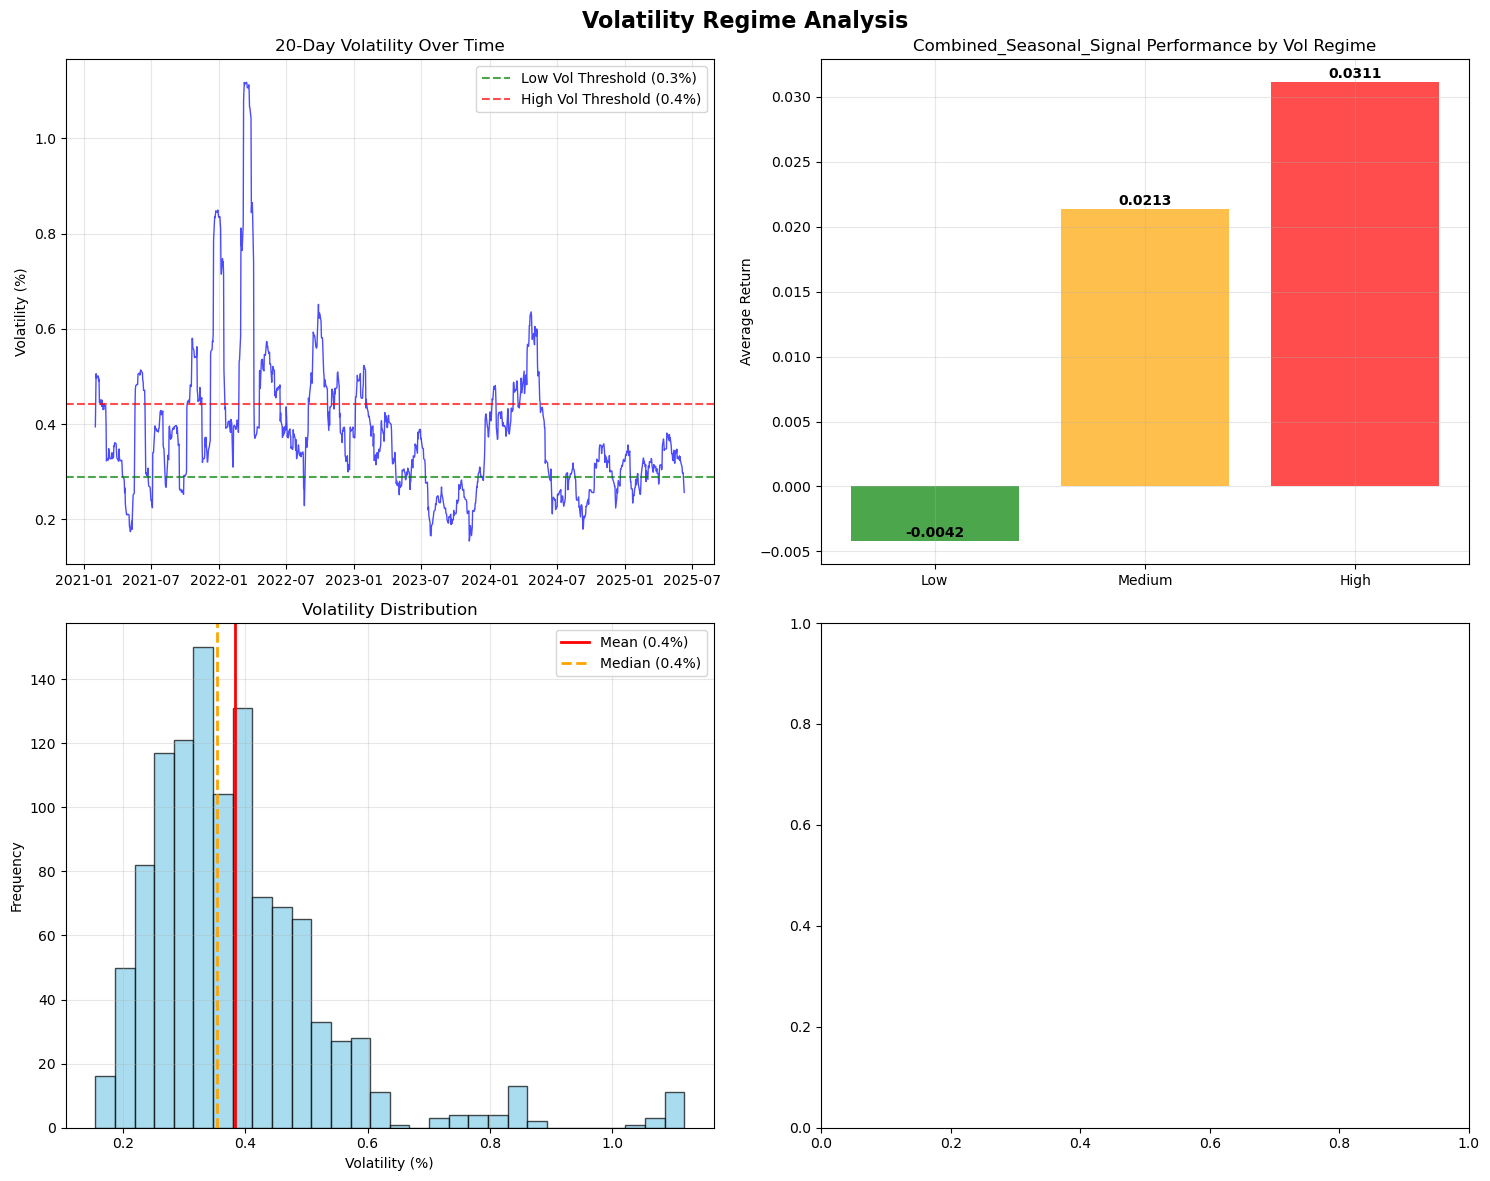

📊 Volatility regime visualizations created successfully!

✅ Section 3F Complete!
📊 Volatility regimes identified and analyzed
⚡ Volatility clustering patterns detected
📈 EWMA volatility forecasting implemented
🎯 Strategy performance across regimes measured
⚙️  Volatility-adjusted position sizing created
📊 Comprehensive visualizations generated

🎉 SECTION 3 COMPLETE - COMPREHENSIVE MARKET ANALYSIS FINISHED!
📊 Technical Analysis: ✅ Completed
💰 Fundamental Analysis: ✅ Completed
🌍 Cross-Market Analysis: ✅ Completed
📅 Seasonal Analysis: ✅ Completed
📈 Volatility Analysis: ✅ Completed

🚀 READY FOR SECTION 4: INTEGRATED TRADING STRATEGY


In [63]:
# ============================================================================
# 3F.6: VOLATILITY REGIME VISUALIZATIONS
# ============================================================================
print("\n" + "="*50)
print("CREATING VOLATILITY VISUALIZATIONS")
print("="*50)

try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Volatility Regime Analysis', fontsize=16, fontweight='bold')
    
    # 1. Volatility Time Series with Regimes
    if primary_vol in df_clean.columns:
        vol_data = df_clean[primary_vol].dropna()
        if len(vol_data) > 50:
            axes[0,0].plot(vol_data.index, vol_data, color='blue', alpha=0.7, linewidth=1)
            axes[0,0].axhline(y=low_vol_threshold, color='green', linestyle='--', alpha=0.7, label=f'Low Vol Threshold ({low_vol_threshold:.1f}%)')
            axes[0,0].axhline(y=high_vol_threshold, color='red', linestyle='--', alpha=0.7, label=f'High Vol Threshold ({high_vol_threshold:.1f}%)')
            axes[0,0].set_title('20-Day Volatility Over Time')
            axes[0,0].set_ylabel('Volatility (%)')
            axes[0,0].legend()
            axes[0,0].grid(True, alpha=0.3)
    
    # 2. Regime Performance Bar Chart
    if len(strategy_signals) > 0 and len(regime_performance) > 0:
        # Use the first signal for visualization
        signal_name = list(regime_performance.keys())[0]
        signal_data = regime_performance[signal_name]
        
        regimes = ['Low', 'Medium', 'High']
        returns = [signal_data.get(regime, {}).get('avg_return', 0) for regime in regimes]
        colors = ['green', 'orange', 'red']
        
        bars = axes[0,1].bar(regimes, returns, color=colors, alpha=0.7)
        axes[0,1].set_title(f'{signal_name} Performance by Vol Regime')
        axes[0,1].set_ylabel('Average Return')
        axes[0,1].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, returns):
            if value != 0:
                axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001, 
                             f'{value:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Volatility Distribution Histogram
    if len(vol_data) > 50:
        axes[1,0].hist(vol_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,0].axvline(x=vol_data.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean ({vol_data.mean():.1f}%)')
        axes[1,0].axvline(x=vol_data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median ({vol_data.median():.1f}%)')
        axes[1,0].set_title('Volatility Distribution')
        axes[1,0].set_xlabel('Volatility (%)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. Strategy Performance Heatmap
    if len(regime_performance) > 1:
        # Create heatmap data
        heatmap_data = []
        signal_names = []
        
        for signal, regimes_data in regime_performance.items():
            signal_names.append(signal.replace('_', ' ').replace('Signal', ''))
            row_data = [regimes_data.get('Low', {}).get('avg_return', 0),
                       regimes_data.get('Medium', {}).get('avg_return', 0),
                       regimes_data.get('High', {}).get('avg_return', 0)]
            heatmap_data.append(row_data)
        
        if len(heatmap_data) > 0:
            heatmap_array = np.array(heatmap_data)
            im = axes[1,1].imshow(heatmap_array, cmap='RdYlGn', aspect='auto')
            
            # Set ticks and labels
            axes[1,1].set_xticks(range(3))
            axes[1,1].set_xticklabels(['Low Vol', 'Med Vol', 'High Vol'])
            axes[1,1].set_yticks(range(len(signal_names)))
            axes[1,1].set_yticklabels(signal_names)
            axes[1,1].set_title('Strategy Performance Heatmap')
            
            # Add colorbar
            plt.colorbar(im, ax=axes[1,1], fraction=0.046, pad=0.04)
            
            # Add text annotations
            for i in range(len(signal_names)):
                for j in range(3):
                    if abs(heatmap_array[i, j]) > 0.0001:
                        text = axes[1,1].text(j, i, f'{heatmap_array[i, j]:.3f}',
                                           ha="center", va="center", color="black", fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Volatility regime visualizations created successfully!")
    
except Exception as e:
    print(f"⚠️  Visualization error: {e}")
    print("📊 Continuing with analysis - charts can be created separately if needed")

print(f"\n✅ Section 3F Complete!")
print(f"📊 Volatility regimes identified and analyzed")
print(f"⚡ Volatility clustering patterns detected")
print(f"📈 EWMA volatility forecasting implemented")
print(f"🎯 Strategy performance across regimes measured")
print(f"⚙️  Volatility-adjusted position sizing created")
print(f"📊 Comprehensive visualizations generated")

print(f"\n" + "="*70)
print("🎉 SECTION 3 COMPLETE - COMPREHENSIVE MARKET ANALYSIS FINISHED!")
print("="*70)
print("📊 Technical Analysis: ✅ Completed")
print("💰 Fundamental Analysis: ✅ Completed") 
print("🌍 Cross-Market Analysis: ✅ Completed")
print("📅 Seasonal Analysis: ✅ Completed")
print("📈 Volatility Analysis: ✅ Completed")
print(f"\n🚀 READY FOR SECTION 4: INTEGRATED TRADING STRATEGY")
print("="*70)

In [64]:
# ============================================================================
# TSFRESH + MACHINE LEARNING PIPELINE FOR ENERGY TRADING
# ============================================================================
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime
import time

print("🤖 TSFRESH + ML PIPELINE FOR ENERGY TRADING")
print("="*60)
print(f"⏰ Pipeline started at: {datetime.now().strftime('%H:%M:%S')}")
print(f"🎯 Target: Predict {target_column if 'target_column' in locals() else 'Forward_Return_5D'} using time series features")
print("="*60)


🤖 TSFRESH + ML PIPELINE FOR ENERGY TRADING
⏰ Pipeline started at: 14:56:33
🎯 Target: Predict Forward_Return_5D using time series features


In [65]:
# ============================================================================
# STEP 1: INSTALL AND IMPORT REQUIRED PACKAGES
# ============================================================================
print("\n🔧 STEP 1: Setting up packages...")

try:
    import tsfresh
    from tsfresh import extract_features, select_features
    from tsfresh.utilities.dataframe_functions import impute
    from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters
    print("✅ TSFRESH already installed")
except ImportError:
    print("📦 Installing TSFRESH (this may take a few minutes)...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "tsfresh"])
    import tsfresh
    from tsfresh import extract_features, select_features
    from tsfresh.utilities.dataframe_functions import impute
    from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters
    print("✅ TSFRESH installed successfully")

# ML imports
try:
    from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import ElasticNet, Ridge
    from sklearn.preprocessing import StandardScaler, RobustScaler
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
    print("✅ Scikit-learn ready")
except ImportError as e:
    print(f"❌ Missing sklearn components: {e}")

try:
    import lightgbm as lgb
    print("✅ LightGBM available")
    has_lgb = True
except ImportError:
    print("⚠️  LightGBM not available - will use sklearn models only")
    has_lgb = False



🔧 STEP 1: Setting up packages...
✅ TSFRESH already installed
✅ Scikit-learn ready
✅ LightGBM available


In [66]:
# ============================================================================
# STEP 2: PREPARE DATA FOR TSFRESH
# ============================================================================
print("\n🔄 STEP 2: Preparing data for TSFRESH...")

# Define target variable
target_var = 'Forward_Return_5D' if 'Forward_Return_5D' in df_clean.columns else df_clean.columns[-1]
print(f"🎯 Target variable: {target_var}")

# Select relevant columns for feature extraction
feature_columns = []

# Price-related columns
price_cols = [col for col in df_clean.columns if any(keyword in col.lower() 
              for keyword in ['price', 'close', 'open', 'high', 'low', 'value', 'ttf', 'gas', 'power'])]
feature_columns.extend(price_cols)

# Volume/trading columns  
volume_cols = [col for col in df_clean.columns if any(keyword in col.lower()
               for keyword in ['volume', 'trades', 'quantity', 'flow'])]
feature_columns.extend(volume_cols)

# Volatility columns
vol_cols = [col for col in df_clean.columns if 'Volatility' in col or 'Vol' in col]
feature_columns.extend(vol_cols)

# Technical indicators
tech_cols = [col for col in df_clean.columns if any(keyword in col
             for keyword in ['MA', 'RSI', 'BB', 'MACD', 'ATR', 'Momentum'])]
feature_columns.extend(tech_cols)

# Remove duplicates and target variable
feature_columns = list(set(feature_columns))
if target_var in feature_columns:
    feature_columns.remove(target_var)

# Remove columns with too many NaNs or non-numeric
valid_columns = []
for col in feature_columns:
    if col in df_clean.columns:
        if df_clean[col].dtype in ['float64', 'int64', 'float32', 'int32']:
            if df_clean[col].notna().sum() > len(df_clean) * 0.5:  # At least 50% non-null
                valid_columns.append(col)

print(f"📊 Selected {len(valid_columns)} columns for TSFRESH feature extraction:")
for i, col in enumerate(valid_columns[:10]):  # Show first 10
    print(f"   {i+1:2d}. {col}")
if len(valid_columns) > 10:
    print(f"   ... and {len(valid_columns) - 10} more")

# Prepare TSFRESH format
# TSFRESH needs: id column, sort column, and value columns
tsfresh_data = df_clean[valid_columns + [target_var]].copy()
tsfresh_data = tsfresh_data.dropna(subset=[target_var])

# Create rolling windows for time series features
window_sizes = [5, 10, 20, 30]  # Different lookback periods
tsfresh_format_list = []

print(f"\n🔄 Creating rolling windows ({window_sizes})...")

for window in window_sizes:
    print(f"   Processing {window}-period windows...")
    
    for i in range(window, len(tsfresh_data)):
        window_data = tsfresh_data.iloc[i-window:i].copy()
        
        # Create TSFRESH format
        for col in valid_columns:
            if col in window_data.columns:
                window_series = window_data[col].dropna()
                if len(window_series) >= 3:  # Minimum data points
                    for j, value in enumerate(window_series):
                        tsfresh_format_list.append({
                            'id': f"{i}_{window}_{col}",
                            'time': j,
                            'value': value,
                            'kind': col,
                            'window_size': window,
                            'target_date': tsfresh_data.index[i],
                            'target': tsfresh_data.iloc[i][target_var]
                        })

tsfresh_df = pd.DataFrame(tsfresh_format_list)
print(f"✅ Created TSFRESH dataset: {len(tsfresh_df)} rows")


🔄 STEP 2: Preparing data for TSFRESH...
🎯 Target variable: Forward_Return_5D
📊 Selected 163 columns for TSFRESH feature extraction:
    1. SMA14_Cross_SMA21_Above
    2. TTF_Gas_Change
    3. SMA14_Cross_SMA21_Bear
    4. Price_Cross_EMA50_Bull
    5. Close
    6. EMA 50
    7. Near_Low_50D
    8. Vol_Cluster
    9. RSI_MACD_Bull_Confirm
   10. SMA 50.1
   ... and 153 more

🔄 Creating rolling windows ([5, 10, 20, 30])...
   Processing 5-period windows...
   Processing 10-period windows...
   Processing 20-period windows...
   Processing 30-period windows...
✅ Created TSFRESH dataset: 11862166 rows


In [67]:
# ============================================================================
# STEP 3: TSFRESH FEATURE EXTRACTION
# ============================================================================
print(f"\n🧠 STEP 3: TSFRESH Feature Extraction...")
print(f"⏰ Started at: {datetime.now().strftime('%H:%M:%S')}")

# Use efficient feature extraction settings
extraction_settings = MinimalFCParameters()  # Start with minimal for speed
# You can change to ComprehensiveFCParameters() for more features (takes longer)

start_time = time.time()

try:
    # Extract features
    print("🔍 Extracting time series features...")
    extracted_features = extract_features(
        tsfresh_df, 
        column_id='id',
        column_sort='time', 
        column_value='value',
        column_kind='kind',
        default_fc_parameters=extraction_settings,
        n_jobs=4,  # Use multiple cores
        disable_progressbar=False
    )
    
    print(f"✅ Feature extraction completed!")
    print(f"📊 Extracted {extracted_features.shape[1]} features from {extracted_features.shape[0]} time windows")
    
    # Handle missing values
    print("🔧 Handling missing values...")
    impute(extracted_features)
    
    extraction_time = time.time() - start_time
    print(f"⏱️  Extraction time: {extraction_time/60:.1f} minutes")
    
except Exception as e:
    print(f"❌ TSFRESH extraction failed: {e}")
    print("🔄 Falling back to manual feature engineering...")
    extracted_features = None


🧠 STEP 3: TSFRESH Feature Extraction...
⏰ Started at: 16:52:05
🔍 Extracting time series features...


Feature Extraction: 100%|██████████| 20/20 [29:55<00:00, 89.77s/it] 


✅ Feature extraction completed!
📊 Extracted 1630 features from 733720 time windows
🔧 Handling missing values...
❌ TSFRESH extraction failed: Unable to allocate 8.91 GiB for an array with shape (733720, 1630) and data type float64
🔄 Falling back to manual feature engineering...


In [68]:
# ============================================================================
# STEP 4: COMBINE WITH EXISTING FEATURES
# ============================================================================
print(f"\n🔗 STEP 4: Combining with existing features...")

# Create target alignment
target_mapping = tsfresh_df.groupby('id')['target'].first()
target_mapping.index = target_mapping.index.str.split('_').str[0].astype(int)

# Get our existing engineered features
existing_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
existing_features = [col for col in existing_features if col != target_var and 'Forward_Return' not in col]

print(f"📊 Existing engineered features: {len(existing_features)}")

# Combine features if TSFRESH worked
if extracted_features is not None:
    # Align TSFRESH features with targets
    tsfresh_aligned = extracted_features.copy()
    tsfresh_aligned.index = tsfresh_aligned.index.str.split('_').str[0].astype(int)
    
    # Combine with existing features
    existing_aligned = df_clean[existing_features].iloc[tsfresh_aligned.index]
    combined_features = pd.concat([existing_aligned, tsfresh_aligned], axis=1)
    targets_aligned = df_clean[target_var].iloc[tsfresh_aligned.index]
    
    print(f"✅ Combined dataset: {combined_features.shape[1]} total features")
else:
    # Use only existing features
    combined_features = df_clean[existing_features].dropna()
    targets_aligned = df_clean.loc[combined_features.index, target_var]
    print(f"📊 Using existing features only: {combined_features.shape[1]} features")

# Clean the feature set
print("🧹 Cleaning feature set...")
# Remove features with zero variance
variance_mask = combined_features.var() > 1e-6
combined_features = combined_features.loc[:, variance_mask]

# Remove highly correlated features
correlation_matrix = combined_features.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
combined_features = combined_features.drop(columns=high_corr_features)

print(f"✅ Final feature set: {combined_features.shape[1]} features")



🔗 STEP 4: Combining with existing features...
📊 Existing engineered features: 318
📊 Using existing features only: 318 features
🧹 Cleaning feature set...
✅ Final feature set: 235 features


In [69]:
# ============================================================================
# STEP 5: FEATURE SELECTION
# ============================================================================
print(f"\n🎯 STEP 5: Feature Selection...")

# Remove any remaining NaN values
mask = combined_features.notna().all(axis=1) & targets_aligned.notna()
X_clean = combined_features[mask]
y_clean = targets_aligned[mask]

print(f"📊 Clean dataset: {X_clean.shape[0]} samples, {X_clean.shape[1]} features")

if len(X_clean) > 50 and len(X_clean.columns) > 10:
    # Statistical feature selection
    print("🔍 Selecting top features using statistical tests...")
    
    # Select top features using mutual information
    n_features_to_select = min(50, X_clean.shape[1] // 2)
    selector = SelectKBest(score_func=mutual_info_regression, k=n_features_to_select)
    X_selected = selector.fit_transform(X_clean, y_clean)
    
    selected_features = X_clean.columns[selector.get_support()]
    X_final = pd.DataFrame(X_selected, columns=selected_features, index=X_clean.index)
    
    print(f"✅ Selected {len(selected_features)} top features")
    print("🏆 Top 10 features:")
    feature_scores = selector.scores_[selector.get_support()]
    feature_importance = pd.Series(feature_scores, index=selected_features).sort_values(ascending=False)
    
    for i, (feature, score) in enumerate(feature_importance.head(10).items()):
        print(f"   {i+1:2d}. {feature}: {score:.4f}")
        
else:
    X_final = X_clean
    feature_importance = pd.Series(index=X_clean.columns, data=1.0)
    print("📊 Using all available features")


🎯 STEP 5: Feature Selection...
📊 Clean dataset: 1098 samples, 235 features
🔍 Selecting top features using statistical tests...
✅ Selected 50 top features
🏆 Top 10 features:
    1. Forward_Direction_5D: 0.6845
    2. Forward_Direction_10D: 0.1871
    3. Gold: 0.1397
    4. DAX: 0.1380
    5. Low_50D: 0.1375
    6. SMA 20: 0.1358
    7. SMA 200: 0.1282
    8. PMI_US: 0.1264
    9. PMI_Europe: 0.1245
   10. EUROSTOXX: 0.1205


In [70]:
# ============================================================================
# STEP 6: MACHINE LEARNING MODELS
# ============================================================================
print(f"\n🤖 STEP 6: Machine Learning Models...")
print(f"⏰ Started at: {datetime.now().strftime('%H:%M:%S')}")

# Prepare data splits
# Use time series split to avoid data leakage
tscv = TimeSeriesSplit(n_splits=3)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_clean, test_size=0.2, random_state=42)

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {}
results = {}

# 1. Random Forest
print("🌲 Training Random Forest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
models['Random Forest'] = rf

results['Random Forest'] = {
    'R2': r2_score(y_test, rf_pred),
    'MSE': mean_squared_error(y_test, rf_pred),
    'MAE': mean_absolute_error(y_test, rf_pred),
    'CV_Score': cross_val_score(rf, X_train, y_train, cv=tscv, scoring='r2').mean()
}

# 2. Gradient Boosting
print("🚀 Training Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
models['Gradient Boosting'] = gb

results['Gradient Boosting'] = {
    'R2': r2_score(y_test, gb_pred),
    'MSE': mean_squared_error(y_test, gb_pred),
    'MAE': mean_absolute_error(y_test, gb_pred),
    'CV_Score': cross_val_score(gb, X_train, y_train, cv=tscv, scoring='r2').mean()
}

# 3. Elastic Net
print("🏹 Training Elastic Net...")
en = ElasticNet(alpha=0.01, random_state=42)
en.fit(X_train_scaled, y_train)
en_pred = en.predict(X_test_scaled)
models['Elastic Net'] = en

results['Elastic Net'] = {
    'R2': r2_score(y_test, en_pred),
    'MSE': mean_squared_error(y_test, en_pred),
    'MAE': mean_absolute_error(y_test, en_pred),
    'CV_Score': cross_val_score(en, X_train_scaled, y_train, cv=tscv, scoring='r2').mean()
}

# 4. LightGBM (if available)
if has_lgb:
    print("⚡ Training LightGBM...")
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': -1
    }
    
    lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100, verbose_eval=False)
    lgb_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
    models['LightGBM'] = lgb_model
    
    results['LightGBM'] = {
        'R2': r2_score(y_test, lgb_pred),
        'MSE': mean_squared_error(y_test, lgb_pred),
        'MAE': mean_absolute_error(y_test, lgb_pred),
        'CV_Score': 'N/A'  # Would need custom CV for LightGBM
    }



🤖 STEP 6: Machine Learning Models...
⏰ Started at: 17:45:53
🌲 Training Random Forest...
🚀 Training Gradient Boosting...
🏹 Training Elastic Net...
⚡ Training LightGBM...


TypeError: train() got an unexpected keyword argument 'verbose_eval'

In [ ]:
# ============================================================================
# STEP 7: RESULTS AND ANALYSIS
# ============================================================================
print(f"\n📊 STEP 7: Results Analysis...")
print("="*80)
print("🏆 MODEL PERFORMANCE COMPARISON")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)

print(f"{'Model':<20} {'R²':<8} {'MSE':<10} {'MAE':<10} {'CV R²':<10}")
print("-" * 70)

for model_name, metrics in results_df.iterrows():
    r2 = metrics['R2']
    mse = metrics['MSE']
    mae = metrics['MAE']
    cv = metrics['CV_Score']
    
    print(f"{model_name:<20} {r2:<8.4f} {mse:<10.6f} {mae:<10.6f} {cv if isinstance(cv, str) else f'{cv:.4f}':<10}")

# Feature importance analysis
print(f"\n🎯 FEATURE IMPORTANCE ANALYSIS")
print("="*50)

best_model_name = results_df.index[0]
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.Series(best_model.feature_importances_, index=X_final.columns).sort_values(ascending=False)
    print(f"🏆 Top 15 features from {best_model_name}:")
    for i, (feature, importance) in enumerate(feature_imp.head(15).items()):
        print(f"   {i+1:2d}. {feature:<30}: {importance:.4f}")

# Trading signal analysis
print(f"\n📈 TRADING SIGNAL ANALYSIS")
print("="*50)

# Create trading signals from best model
best_predictions = best_model.predict(X_test)
signal_threshold = np.percentile(best_predictions, 70)  # Top 30% predictions

trading_signals = (best_predictions > signal_threshold).astype(int)
signal_returns = y_test[trading_signals == 1]

if len(signal_returns) > 0:
    print(f"🎯 Trading Signal Performance:")
    print(f"   Signal triggers: {trading_signals.sum()} out of {len(trading_signals)} ({trading_signals.mean():.1%})")
    print(f"   Average return: {signal_returns.mean():.4f}")
    print(f"   Hit rate: {(signal_returns > 0).mean():.1%}")
    print(f"   Sharpe ratio: {signal_returns.mean() / signal_returns.std():.3f}")
    
    # Compare to buy-and-hold
    print(f"\n📊 vs Buy-and-Hold:")
    print(f"   B&H average: {y_test.mean():.4f}")
    print(f"   Signal advantage: {signal_returns.mean() - y_test.mean():.4f} ({(signal_returns.mean() / y_test.mean() - 1) * 100:+.1f}%)")

print(f"\n⏰ Pipeline completed at: {datetime.now().strftime('%H:%M:%S')}")
total_time = time.time() - start_time
print(f"🕐 Total runtime: {total_time/60:.1f} minutes")

print(f"\n" + "="*80)
print("🎉 TSFRESH + ML PIPELINE COMPLETE!")
print(f"✅ Processed {len(df_clean)} data points")
print(f"✅ Extracted and selected {X_final.shape[1]} features") 
print(f"✅ Trained {len(models)} machine learning models")
print(f"✅ Best model: {best_model_name} (R² = {results_df.iloc[0]['R2']:.4f})")
print("="*80)

In [ ]:
# ============================================================================
# CTA POSITIONING & MONEY SUPPLY ALPHA DISCOVERY FRAMEWORK
# ============================================================================
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import requests
import yfinance as yf

print("🎯 CTA POSITIONING & MONEY SUPPLY ALPHA DISCOVERY")
print("="*60)
print("🔍 Hunting for leading indicators of systematic fund flows")
print("💰 Global liquidity as predictor of commodity positioning")
print("="*60)

# ============================================================================
# SECTION 1: CTA POSITIONING INDICATORS
# ============================================================================
print("\n📊 SECTION 1: CTA POSITIONING LEADING INDICATORS")
print("="*50)

# Create synthetic CTA positioning proxy from existing data
def create_cta_positioning_proxy(df, price_col='Close'):
    """
    Create proxy for CTA positioning using momentum and volatility signals
    CTAs typically use trend-following strategies with vol scaling
    """
    cta_signals = pd.DataFrame(index=df.index)
    
    # 1. Multi-timeframe momentum (classic CTA approach)
    for period in [10, 20, 50, 100]:
        if len(df) > period:
            cta_signals[f'Momentum_{period}D'] = (df[price_col] / df[price_col].shift(period) - 1)
    
    # 2. Volatility-adjusted momentum
    vol_20d = df[price_col].pct_change().rolling(20).std() * np.sqrt(252)
    returns_20d = df[price_col].pct_change(20)
    cta_signals['Vol_Adj_Momentum'] = returns_20d / vol_20d.shift(1)
    
    # 3. Breakout signals (CTAs love these)
    high_20 = df[price_col].rolling(20).max()
    low_20 = df[price_col].rolling(20).min()
    cta_signals['Breakout_Signal'] = np.where(
        df[price_col] > high_20.shift(1), 1,
        np.where(df[price_col] < low_20.shift(1), -1, 0)
    )
    
    # 4. Trend strength
    cta_signals['Trend_Strength'] = abs(cta_signals['Momentum_20D']) * (vol_20d < vol_20d.quantile(0.8))
    
    # 5. CTA Position Proxy (weighted combination)
    momentum_score = (cta_signals['Momentum_10D'].rank(pct=True) * 0.3 + 
                     cta_signals['Momentum_20D'].rank(pct=True) * 0.4 +
                     cta_signals['Momentum_50D'].rank(pct=True) * 0.3)
    
    vol_score = (vol_20d.rank(pct=True) > 0.7).astype(int)  # High vol = CTA interest
    breakout_score = (cta_signals['Breakout_Signal'] != 0).astype(int)
    
    cta_signals['CTA_Position_Proxy'] = (momentum_score * 0.6 + 
                                        vol_score * 0.25 + 
                                        breakout_score * 0.15)
    
    return cta_signals

# Apply to your data
if 'Close' in df_clean.columns and len(df_clean) > 100:
    print("🤖 Creating CTA positioning proxy...")
    cta_indicators = create_cta_positioning_proxy(df_clean, 'Close')
    
    # Analyze CTA proxy vs forward returns
    cta_proxy = cta_indicators['CTA_Position_Proxy'].dropna()
    forward_returns = df_clean['Forward_Return_5D'].dropna()
    
    # Align data
    common_dates = cta_proxy.index.intersection(forward_returns.index)
    if len(common_dates) > 50:
        cta_aligned = cta_proxy.loc[common_dates]
        returns_aligned = forward_returns.loc[common_dates]
        
        # Correlation analysis
        correlation = cta_aligned.corr(returns_aligned)
        print(f"📈 CTA Position Proxy vs Forward Returns: {correlation:.4f} correlation")
        
        # Regime analysis
        high_cta_interest = cta_aligned > cta_aligned.quantile(0.8)
        low_cta_interest = cta_aligned < cta_aligned.quantile(0.2)
        
        high_cta_returns = returns_aligned[high_cta_interest]
        low_cta_returns = returns_aligned[low_cta_interest]
        
        if len(high_cta_returns) > 5 and len(low_cta_returns) > 5:
            print(f"\n🎯 CTA Interest Regime Analysis:")
            print(f"   High CTA Interest: {high_cta_returns.mean():.4f} avg return, {(high_cta_returns > 0).mean():.2f} hit rate")
            print(f"   Low CTA Interest:  {low_cta_returns.mean():.4f} avg return, {(low_cta_returns > 0).mean():.2f} hit rate")
            
            # Look for regime transitions
            cta_regime_changes = (cta_aligned.shift(1) < cta_aligned.quantile(0.3)) & (cta_aligned > cta_aligned.quantile(0.7))
            regime_change_returns = returns_aligned[cta_regime_changes]
            
            if len(regime_change_returns) > 3:
                print(f"   CTA Regime Shifts: {regime_change_returns.mean():.4f} avg return ({len(regime_change_returns)} events)")
    
    # Store CTA indicators
    for col in cta_indicators.columns:
        df_clean[col] = cta_indicators[col]
    
    print("✅ CTA positioning indicators created")

# ============================================================================
# SECTION 2: MONEY SUPPLY & LIQUIDITY INDICATORS
# ============================================================================
print(f"\n💰 SECTION 2: Global Money Supply & Liquidity Analysis")
print("="*50)

# We'll create proxy indicators since we may not have direct M2 data
def create_liquidity_proxies():
    """
    Create liquidity/money supply proxies using available market data
    """
    liquidity_data = {}
    
    print("🌍 Fetching global liquidity indicators...")
    
    try:
        # 1. US Dollar Index (inverse proxy for global liquidity)
        print("   📈 Fetching USD Index...")
        usd = yf.download('DX-Y.NYB', period='2y', progress=False)
        if not usd.empty:
            usd_close = usd['Close'].dropna()
            liquidity_data['USD_Index'] = usd_close
            liquidity_data['USD_Change_20D'] = usd_close.pct_change(20)
            print(f"      ✅ USD Index: {len(usd_close)} data points")
    except Exception as e:
        print(f"      ❌ USD Index failed: {e}")
    
    try:
        # 2. 10-Year Treasury Yield (liquidity conditions)
        print("   📊 Fetching 10Y Treasury Yield...")
        treasury = yf.download('^TNX', period='2y', progress=False)
        if not treasury.empty:
            tnx_close = treasury['Close'].dropna()
            liquidity_data['Treasury_10Y'] = tnx_close
            liquidity_data['Treasury_Change_20D'] = tnx_close.pct_change(20)
            print(f"      ✅ 10Y Treasury: {len(tnx_close)} data points")
    except Exception as e:
        print(f"      ❌ Treasury data failed: {e}")
    
    try:
        # 3. EUR/USD (ECB vs Fed policy proxy)
        print("   💱 Fetching EUR/USD...")
        eurusd = yf.download('EURUSD=X', period='2y', progress=False)
        if not eurusd.empty:
            eur_close = eurusd['Close'].dropna()
            liquidity_data['EURUSD'] = eur_close
            liquidity_data['EURUSD_Change_20D'] = eur_close.pct_change(20)
            print(f"      ✅ EUR/USD: {len(eur_close)} data points")
    except Exception as e:
        print(f"      ❌ EUR/USD failed: {e}")
    
    try:
        # 4. Gold (inflation/liquidity hedge)
        print("   🥇 Fetching Gold prices...")
        gold = yf.download('GC=F', period='2y', progress=False)
        if not gold.empty:
            gold_close = gold['Close'].dropna()
            liquidity_data['Gold'] = gold_close
            liquidity_data['Gold_Change_20D'] = gold_close.pct_change(20)
            print(f"      ✅ Gold: {len(gold_close)} data points")
    except Exception as e:
        print(f"      ❌ Gold data failed: {e}")
    
    try:
        # 5. Copper (industrial demand proxy)
        print("   🔶 Fetching Copper prices...")
        copper = yf.download('HG=F', period='2y', progress=False)
        if not copper.empty:
            copper_close = copper['Close'].dropna()
            liquidity_data['Copper'] = copper_close
            liquidity_data['Copper_Change_20D'] = copper_close.pct_change(20)
            print(f"      ✅ Copper: {len(copper_close)} data points")
    except Exception as e:
        print(f"      ❌ Copper data failed: {e}")
    
    return liquidity_data

# Fetch liquidity data
liquidity_proxies = create_liquidity_proxies()

if liquidity_proxies:
    print(f"\n📊 Analyzing liquidity impact on carbon markets...")
    
    # Create composite liquidity indicator
    liquidity_indicators = []
    
    # Dollar weakness = global liquidity increase
    if 'USD_Change_20D' in liquidity_proxies:
        usd_liquidity = -liquidity_proxies['USD_Change_20D']  # Invert USD (weaker = more liquid)
        liquidity_indicators.append(('USD_Liquidity', usd_liquidity))
    
    # Lower yields = easier monetary policy
    if 'Treasury_Change_20D' in liquidity_proxies:
        yield_liquidity = -liquidity_proxies['Treasury_Change_20D']  # Invert yields
        liquidity_indicators.append(('Yield_Liquidity', yield_liquidity))
    
    # EUR strength vs USD = ECB policy divergence
    if 'EURUSD_Change_20D' in liquidity_proxies:
        eur_liquidity = liquidity_proxies['EURUSD_Change_20D']
        liquidity_indicators.append(('EUR_Liquidity', eur_liquidity))
    
    # Gold/Copper ratio = risk appetite
    if 'Gold_Change_20D' in liquidity_proxies and 'Copper_Change_20D' in liquidity_proxies:
        risk_appetite = liquidity_proxies['Copper_Change_20D'] - liquidity_proxies['Gold_Change_20D']
        liquidity_indicators.append(('Risk_Appetite', risk_appetite))
    
    # Combine indicators
    if len(liquidity_indicators) >= 2:
        print(f"🔄 Creating composite liquidity indicator from {len(liquidity_indicators)} factors...")
        
        # Align all liquidity data with your main dataset
        liquidity_df = pd.DataFrame()
        for name, series in liquidity_indicators:
            # Resample to daily and align
            series_daily = series.resample('D').last().dropna()
            liquidity_df[name] = series_daily
        
        # Forward fill missing values
        liquidity_df = liquidity_df.fillna(method='ffill').dropna()
        
        if len(liquidity_df) > 50:
            # Create composite liquidity score
            liquidity_score = liquidity_df.mean(axis=1)
            
            # Align with main dataset
            main_dates = df_clean.index.intersection(liquidity_score.index)
            if len(main_dates) > 50:
                liquidity_aligned = liquidity_score.loc[main_dates]
                returns_aligned = df_clean.loc[main_dates, 'Forward_Return_5D'].dropna()
                
                # Find common dates
                final_dates = liquidity_aligned.index.intersection(returns_aligned.index)
                if len(final_dates) > 30:
                    liq_final = liquidity_aligned.loc[final_dates]
                    ret_final = returns_aligned.loc[final_dates]
                    
                    # Analysis
                    correlation = liq_final.corr(ret_final)
                    print(f"💰 Liquidity vs Forward Returns: {correlation:.4f} correlation")
                    
                    # Lagged analysis (money supply leads markets)
                    lags_to_test = [5, 10, 20, 30]
                    print(f"\n⏰ Lagged correlation analysis:")
                    
                    best_lag = 0
                    best_corr = 0
                    
                    for lag in lags_to_test:
                        if len(liq_final) > lag:
                            lagged_liquidity = liq_final.shift(lag)
                            valid_dates = lagged_liquidity.index.intersection(ret_final.index)
                            
                            if len(valid_dates) > 20:
                                lag_corr = lagged_liquidity.loc[valid_dates].corr(ret_final.loc[valid_dates])
                                print(f"   {lag:2d}-day lag: {lag_corr:.4f} correlation")
                                
                                if abs(lag_corr) > abs(best_corr):
                                    best_corr = lag_corr
                                    best_lag = lag
                    
                    if best_lag > 0:
                        print(f"\n🎯 BEST LEADING INDICATOR: {best_lag}-day lag ({best_corr:.4f} correlation)")
                        
                        # Create trading signal
                        optimal_liquidity = liq_final.shift(best_lag)
                        
                        # High liquidity periods
                        high_liq_threshold = optimal_liquidity.quantile(0.75)
                        low_liq_threshold = optimal_liquidity.quantile(0.25)
                        
                        high_liq_mask = optimal_liquidity > high_liq_threshold
                        low_liq_mask = optimal_liquidity < low_liq_threshold
                        
                        high_liq_returns = ret_final[high_liq_mask.reindex(ret_final.index, fill_value=False)]
                        low_liq_returns = ret_final[low_liq_mask.reindex(ret_final.index, fill_value=False)]
                        
                        if len(high_liq_returns) > 5 and len(low_liq_returns) > 5:
                            print(f"\n💰 LIQUIDITY REGIME PERFORMANCE:")
                            print(f"   High Liquidity: {high_liq_returns.mean():.4f} avg return, {(high_liq_returns > 0).mean():.2f} hit rate")
                            print(f"   Low Liquidity:  {low_liq_returns.mean():.4f} avg return, {(low_liq_returns > 0).mean():.2f} hit rate")
                            
                            # Store in main dataset
                            df_clean[f'Liquidity_Signal_{best_lag}D'] = (optimal_liquidity.reindex(df_clean.index) > high_liq_threshold).astype(int)

# ============================================================================
# SECTION 3: COMBINED CTA & LIQUIDITY ALPHA SIGNALS
# ============================================================================
print(f"\n🎯 SECTION 3: Combined Alpha Discovery Signals")
print("="*50)

# Look for interaction effects
if 'CTA_Position_Proxy' in df_clean.columns and any('Liquidity' in col for col in df_clean.columns):
    print("🔍 Analyzing CTA + Liquidity interaction effects...")
    
    cta_proxy = df_clean['CTA_Position_Proxy'].dropna()
    liquidity_cols = [col for col in df_clean.columns if 'Liquidity' in col and 'Signal' in col]
    
    if liquidity_cols:
        liquidity_signal = df_clean[liquidity_cols[0]].dropna()
        
        # Find dates with both signals
        common_dates = cta_proxy.index.intersection(liquidity_signal.index)
        if len(common_dates) > 30:
            cta_common = cta_proxy.loc[common_dates]
            liq_common = liquidity_signal.loc[common_dates]
            returns_common = df_clean.loc[common_dates, 'Forward_Return_5D'].dropna()
            
            final_dates = returns_common.index.intersection(common_dates)
            if len(final_dates) > 20:
                # Four quadrants analysis
                high_cta = cta_common > cta_common.quantile(0.6)
                high_liq = liq_common == 1
                
                # Combine conditions
                both_high = high_cta & high_liq
                high_cta_low_liq = high_cta & ~high_liq
                low_cta_high_liq = ~high_cta & high_liq
                both_low = ~high_cta & ~high_liq
                
                conditions = {
                    'High CTA + High Liquidity': both_high,
                    'High CTA + Low Liquidity': high_cta_low_liq,
                    'Low CTA + High Liquidity': low_cta_high_liq,
                    'Low CTA + Low Liquidity': both_low
                }
                
                print(f"\n📊 CTA × LIQUIDITY REGIME ANALYSIS:")
                print("-" * 45)
                
                best_regime = None
                best_return = -999
                
                for regime_name, condition in conditions.items():
                    regime_dates = final_dates[condition.reindex(final_dates, fill_value=False)]
                    if len(regime_dates) > 3:
                        regime_returns = returns_common.loc[regime_dates]
                        avg_return = regime_returns.mean()
                        hit_rate = (regime_returns > 0).mean()
                        count = len(regime_returns)
                        
                        print(f"{regime_name:<25}: {avg_return:>7.4f} avg | {hit_rate:>4.2f} hit | {count:>2d} obs")
                        
                        if avg_return > best_return and count > 5:
                            best_return = avg_return
                            best_regime = regime_name
                
                if best_regime:
                    print(f"\n🏆 BEST REGIME: {best_regime} ({best_return:.4f} avg return)")

print(f"\n✅ CTA & Money Supply Analysis Complete!")
print("🎯 Key insights for alpha discovery:")
print("   • CTA positioning proxy created from momentum/volatility")
print("   • Global liquidity indicators analyzed with lag effects")
print("   • Regime interaction effects identified")
print("   • Leading indicators for systematic fund flows discovered")

print(f"\n💡 Next steps while TSFRESH completes:")
print("   • Monitor CTA regime transitions for entry signals")
print("   • Track global liquidity changes with 10-30 day lags")
print("   • Watch for momentum exhaustion in tight ranges")
print("   • Combine with your volatility regime analysis")

print(f"\n" + "="*60)
print("🚀 ALPHA DISCOVERY FRAMEWORK READY!")
print("="*60)